## Ironhack DAPT Jan 2024 - Mid-project


#### Historical] Restaurant Inspection Scores (2016-2019)


### Group' Hungre'



#### Authors: Shakt



#### Dataset:Restaurant Inspection Scoress https://data.sfgov.org/Health-and-Social-Services/-Historical-Restaurant-Inspection-Scores-2016-2019/pyih-qa8i/about_data?row_index=0s)


In [79]:
# Import all dependencies 

import imblearn
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import getpass
import matplotlib.pyplot as plt
import seaborn as sns#
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import TomekLinks
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score



from sklearn.tree import plot_tree
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [22]:
# Load the dataset 
df = pd.read_csv("_Historical__Restaurant_Inspection_Scores__2016-2019__20240401.csv")
df

business_id                business_name     business_address  \
0           85936                 Laurel Court         950 Mason St   
1            5827  HILLCREST ELEMENTARY SCHOOL       810 SILVER Ave   
2           94910                Ike's Kitchen     800 Van Ness Ave   
3           64667           Jasmine Rae Bakery  1890 Bryant St #309   
4           97722           THE CHURRO FACTORY        PIER 39  K-01   
...           ...                          ...                  ...   
53968       70220            Trader Joe's #200         1095 Hyde St   
53969       95021                   Wing Wings        422 Haight St   
53970       78289              Sam Jordans Bar         4004 03rd St   
53971      100887            ASIA CHINESE FOOD          350 BAY ST.   
53972       15120       Nordstrom Espresso Bar    865 Market Street   

       business_city business_state business_postal_code  business_latitude  \
0      San Francisco             CA                94108                NaN   
1      San Francisco             CA                94134          37.729016   
2      San Francisco             CA                94109                NaN   
3      San Francisco             CA                94110          37.763156   
4      San Francisco             CA                94133                NaN   
...              ...            ...                  ...                ...   
53968  San Francisco             CA                94109                NaN   
53969  San Francisco             CA                94117                NaN   
53970  San Francisco             CA                94124                NaN   
53971  San Francisco             CA                94133                NaN   
53972  San Francisco             CA                94103          37.784317   

       business_longitude              business_location  \
0                     NaN                            NaN   
1             -122.419253  POINT (-122.419253 37.729016)   
2                     NaN                            NaN   
3             -122.410351  POINT (-122.410351 37.763156)   
4                     NaN                            NaN   
...                   ...                            ...   
53968                 NaN                            NaN   
53969                 NaN                            NaN   
53970                 NaN                            NaN   
53971                 NaN                            NaN   
53972         -122.407563  POINT (-122.407563 37.784317)   

       business_phone_number    inspection_id         inspection_date  \
0               1.415578e+10   85936_20170925  09/25/2017 12:00:00 AM   
1               1.415546e+10    5827_20170224  02/24/2017 12:00:00 AM   
2                        NaN   94910_20180530  05/30/2018 12:00:00 AM   
3                        NaN   64667_20170814  08/14/2017 12:00:00 AM   
4                        NaN   97722_20181217  12/17/2018 12:00:00 AM   
...                      ...              ...                     ...   
53968           1.415530e+10   70220_20170913  09/13/2017 12:00:00 AM   
53969           1.415584e+10   95021_20190228  02/28/2019 12:00:00 AM   
53970                    NaN   78289_20161209  12/09/2016 12:00:00 AM   
53971           1.415582e+10  100887_20190814  08/14/2019 12:00:00 AM   
53972                    NaN   15120_20180712  07/12/2018 12:00:00 AM   

       inspection_score            inspection_type           violation_id  \
0                 100.0      Routine - Unscheduled                    NaN   
1                   NaN      Reinspection/Followup                    NaN   
2                   NaN   New Ownership - Followup                    NaN   
3                   NaN      Reinspection/Followup                    NaN   
4                  96.0      Routine - Unscheduled  97722_20181217_103154   
...                 ...                        ...                    ...   
53968               NaN                  Complaint                 

In [23]:
#Rename the column if columns name are not properly written
df = df.rename(columns=lambda x: x.lower().replace(' ', '_'))

* ## Basic understanding of the dataset

* #### Nans, features, data types, basic stats, head.
* #### Check for more

In [24]:
# Check for more
df.head()

business_id                business_name     business_address  \
0       85936                 Laurel Court         950 Mason St   
1        5827  HILLCREST ELEMENTARY SCHOOL       810 SILVER Ave   
2       94910                Ike's Kitchen     800 Van Ness Ave   
3       64667           Jasmine Rae Bakery  1890 Bryant St #309   
4       97722           THE CHURRO FACTORY        PIER 39  K-01   

   business_city business_state business_postal_code  business_latitude  \
0  San Francisco             CA                94108                NaN   
1  San Francisco             CA                94134          37.729016   
2  San Francisco             CA                94109                NaN   
3  San Francisco             CA                94110          37.763156   
4  San Francisco             CA                94133                NaN   

   business_longitude              business_location  business_phone_number  \
0                 NaN                            NaN           1.415578e+10   
1         -122.419253  POINT (-122.419253 37.729016)           1.415546e+10   
2                 NaN                            NaN                    NaN   
3         -122.410351  POINT (-122.410351 37.763156)                    NaN   
4                 NaN                            NaN                    NaN   

    inspection_id         inspection_date  inspection_score  \
0  85936_20170925  09/25/2017 12:00:00 AM             100.0   
1   5827_20170224  02/24/2017 12:00:00 AM               NaN   
2  94910_20180530  05/30/2018 12:00:00 AM               NaN   
3  64667_20170814  08/14/2017 12:00:00 AM               NaN   
4  97722_20181217  12/17/2018 12:00:00 AM              96.0   

            inspection_type           violation_id  \
0     Routine - Unscheduled                    NaN   
1     Reinspection/Followup                    NaN   
2  New Ownership - Followup                    NaN   
3     Reinspection/Followup                    NaN   
4     Routine - Unscheduled  97722_20181217_103154   

                          violation_description risk_category  neighborhoods  \
0                                           NaN           NaN            NaN   
1                                           NaN           NaN           92.0   
2                                           NaN           NaN            NaN   
3                                           NaN           NaN           53.0   
4  Unclean or degraded floors walls or ceilings      Low Risk            NaN   

   sf_find_neighborhoods  current_police_districts  \
0                    NaN                       NaN   
1                   92.0                       2.0   
2                    NaN                       NaN   
3                   53.0                       3.0   
4                    NaN                       NaN   

   current_supervisor_districts  analysis_neighborhoods  
0                           NaN                     NaN  
1                           2.0                     7.0  
2                           NaN                     NaN  
3                           2.0                    20.0  
4                           NaN                     NaN

In [25]:
# Check the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53973 entries, 0 to 53972
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   business_id                   53973 non-null  object 
 1   business_name                 51901 non-null  object 
 2   business_address              51901 non-null  object 
 3   business_city                 51901 non-null  object 
 4   business_state                51901 non-null  object 
 5   business_postal_code          50761 non-null  object 
 6   business_latitude             26573 non-null  float64
 7   business_longitude            26573 non-null  float64
 8   business_location             26558 non-null  object 
 9   business_phone_number         17241 non-null  float64
 10  inspection_id                 51901 non-null  object 
 11  inspection_date               51901 non-null  object 
 12  inspection_score              38078 non-null  float64
 13  i

There are lots of null value, missing data

In [26]:
# Check the features 
df.columns

Index(['business_id', 'business_name', 'business_address', 'business_city',
       'business_state', 'business_postal_code', 'business_latitude',
       'business_longitude', 'business_location', 'business_phone_number',
       'inspection_id', 'inspection_date', 'inspection_score',
       'inspection_type', 'violation_id', 'violation_description',
       'risk_category', 'neighborhoods', 'sf_find_neighborhoods',
       'current_police_districts', 'current_supervisor_districts',
       'analysis_neighborhoods'],
      dtype='object')

In [27]:
# Check the data types 
df.dtypes

business_id                      object
business_name                    object
business_address                 object
business_city                    object
business_state                   object
business_postal_code             object
business_latitude               float64
business_longitude              float64
business_location                object
business_phone_number           float64
inspection_id                    object
inspection_date                  object
inspection_score                float64
inspection_type                  object
violation_id                     object
violation_description            object
risk_category                    object
neighborhoods                   float64
sf_find_neighborhoods           float64
current_police_districts        float64
current_supervisor_districts    float64
analysis_neighborhoods          float64
dtype: object

In [28]:
# Check basic stats
df.describe()

business_latitude  business_longitude  business_phone_number  \
count       26573.000000        26573.000000           1.724100e+04   
mean           37.749975         -122.358242           1.415542e+10   
std             0.897474            2.908100           1.356890e+06   
min             0.000000         -122.510896           1.415020e+10   
25%            37.755282         -122.437550           1.415537e+10   
50%            37.779847         -122.419308           1.415561e+10   
75%            37.788773         -122.407563           1.415580e+10   
max            37.824494            0.000000           1.415988e+10   

       inspection_score  neighborhoods  sf_find_neighborhoods  \
count      38078.000000    26533.00000            26533.00000   
mean          86.157624       56.88226               56.88226   
std            8.481331       34.70851               34.70851   
min           45.000000        1.00000                1.00000   
25%           81.000000       29.00000               29.00000   
50%           87.000000       53.00000               53.00000   
75%           92.000000       94.00000               94.00000   
max          100.000000      117.00000              117.00000   

       current_police_districts  current_supervisor_districts  \
count              26545.000000                  26545.000000   
mean                   5.369184                      5.628329   
std                    2.703014                      3.294407   
min                    1.000000                      1.000000   
25%                    3.000000                      3.000000   
50%                    6.000000                      5.000000   
75%                    8.000000                      9.000000   
max                   10.000000                     11.000000   

       analysis_neighborhoods  
count            26545.000000  
mean                19.509135  
std                 11.599060  
min                  1.000000  
25%                  8.000000  
50%                 20.000000  
75%                 30.000000  
max                 41.000000

In [29]:
# Check for nans 
df.isna().sum()

business_id                         0
business_name                    2072
business_address                 2072
business_city                    2072
business_state                   2072
business_postal_code             3212
business_latitude               27400
business_longitude              27400
business_location               27415
business_phone_number           36732
inspection_id                    2072
inspection_date                  2072
inspection_score                15895
inspection_type                  2072
violation_id                    15159
violation_description           15159
risk_category                   15159
neighborhoods                   27440
sf_find_neighborhoods           27440
current_police_districts        27428
current_supervisor_districts    27428
analysis_neighborhoods          27428
dtype: int64

In [30]:
#calculates the percentage of missing values,
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

business_id - 0%
business_name - 4%
business_address - 4%
business_city - 4%
business_state - 4%
business_postal_code - 6%
business_latitude - 51%
business_longitude - 51%
business_location - 51%
business_phone_number - 68%
inspection_id - 4%
inspection_date - 4%
inspection_score - 29%
inspection_type - 4%
violation_id - 28%
violation_description - 28%
risk_category - 28%
neighborhoods - 51%
sf_find_neighborhoods - 51%
current_police_districts - 51%
current_supervisor_districts - 51%
analysis_neighborhoods - 51%


In [31]:
#Dropping all naans 
df.dropna(subset=['business_name','business_address', 'business_city',
       'business_state', 'business_postal_code', 'business_latitude',
       'business_longitude', 'business_location', 'business_phone_number',
       'inspection_id', 'inspection_date', 'inspection_score',
       'inspection_type', 'violation_id', 'violation_description',
       'risk_category', 'neighborhoods', 'sf_find_neighborhoods',
       'current_police_districts', 'current_supervisor_districts',
       'analysis_neighborhoods'], inplace=True) 

I studied the Data very well, I figured out that I Could separate this Data Solution into two parts.
* inspection_score  and * Business
where
*Inspection Score will be my Target Column and bhalu.Beside that, I will inspect all Risk 
and violation under that risk Category.

    So in the end, I will look for the Inspection score, Risk, and violation of Inspection.


In [32]:
# For Inspection score what i don't need I am Dropping all these vcolumn
df.drop(["business_name"], axis=1 , inplace=True)
df.drop(["business_address"], axis=1 , inplace=True)
df.drop(["business_postal_code"], axis=1 , inplace=True)
df.drop(["business_latitude"], axis=1 , inplace=True)
df.drop(["business_longitude"], axis=1 , inplace=True)
df.drop(["business_location"], axis=1 , inplace=True)
df.drop(["business_phone_number"], axis=1 , inplace=True)
df.drop(["inspection_id"], axis=1 , inplace=True)
df.drop(["violation_id"], axis=1 , inplace=True)
df.drop(["neighborhoods"], axis=1 , inplace=True)
df.drop(["sf_find_neighborhoods"], axis=1 , inplace=True)
df.drop(["current_police_districts"], axis=1 , inplace=True) 
df.drop(["current_supervisor_districts"], axis=1 , inplace=True)
df.drop(["analysis_neighborhoods"], axis=1 , inplace=True)

In [33]:
#After dropping Looking the Data
df.head()

business_id  business_city business_state         inspection_date  \
110        3649  San Francisco             CA  12/06/2017 12:00:00 AM   
119         184  San Francisco             CA  02/13/2018 12:00:00 AM   
122        1154  San Francisco             CA  03/27/2019 12:00:00 AM   
123        1636  San Francisco             CA  10/03/2018 12:00:00 AM   
173        7764  San Francisco             CA  07/18/2018 12:00:00 AM   

     inspection_score        inspection_type  \
110              82.0  Routine - Unscheduled   
119              90.0  Routine - Unscheduled   
122              46.0  Routine - Unscheduled   
123              88.0  Routine - Unscheduled   
173              90.0  Routine - Unscheduled   

                                 violation_description  risk_category  
110                   Moderate risk vermin infestation  Moderate Risk  
119            Insufficient hot water or running water  Moderate Risk  
122  Inadequate and inaccessible handwashing facili...  Moderate Risk  
123  Wiping cloths not clean or properly stored or ...       Low Risk  
173       Unclean or degraded floors walls or ceilings       Low Risk

* ## Data Featuring,
I am giving a new column with categories for the risk_category column, which
will explain the cause of risk_category according to the new column.
* #### Column name -(public_health_effect) featuring three effect of the risk_category to the publick health
* High Risk-food borne illnesses
* Moderate Risk-Diggyness
* Low Risk- no immediate risk

In [94]:
# Convert 'risk_category' column to numeric (assuming it contains strings like 'Moderate Risk', 'Low Risk', etc.)
df["public_health_effect"] = pd.to_numeric(df["risk_category"], errors='coerce')

def advisor(risk_category):
    if risk_category == 'High Risk':
        return "food borne illnesses"
    elif risk_category in ['Moderate Risk']:
        return "Diggyness"
    else:
        return "no immediate risk"

df["public_health_effect"] = df["risk_category"].apply(lambda x : advisor (x))
df

business_id  business_city business_state inspection_date  \
110          3649  San Francisco             CA      2017-12-06   
119           184  San Francisco             CA      2018-02-13   
122          1154  San Francisco             CA      2019-03-27   
123          1636  San Francisco             CA      2018-10-03   
173          7764  San Francisco             CA      2018-07-18   
...           ...            ...            ...             ...   
37965       67237  San Francisco             CA      2017-09-14   
38042       68442  San Francisco             CA      2019-02-21   
38045       67330  San Francisco             CA      2018-02-08   
38099       69769  San Francisco             CA      2017-06-13   
38116       71476  San Francisco             CA      2018-06-28   

       inspection_score        inspection_type  \
110                82.0  Routine - Unscheduled   
119                90.0  Routine - Unscheduled   
122                46.0  Routine - Unscheduled   
123                88.0  Routine - Unscheduled   
173                90.0  Routine - Unscheduled   
...                 ...                    ...   
37965              84.0  Routine - Unscheduled   
38042              88.0  Routine - Unscheduled   
38045              88.0  Routine - Unscheduled   
38099              88.0  Routine - Unscheduled   
38116              92.0  Routine - Unscheduled   

                                   violation_description  risk_category  \
110                     Moderate risk vermin infestation  Moderate Risk   
119              Insufficient hot water or running water  Moderate Risk   
122    Inadequate and inaccessible handwashing facili...  Moderate Risk   
123    Wiping cloths not clean or properly stored or ...       Low Risk   
173         Unclean or degraded floors walls or ceilings       Low Risk   
...                                                  ...            ...   
37965       Unclean or degraded floors walls or ceilings       Low Risk   
38042                        Low risk vermin infestation       Low Risk   
38045       Unclean or degraded floors walls or ceilings       Low Risk   
38099  Inadequately cleaned or sanitized food contact...  Moderate Risk   
38116  Inadequately cleaned or sanitized food contact...  Moderate Risk   

      public_health_effect  inspection_year responce_result ratings  \
110              Diggyness             2017             Yes    3.5    
119              Diggyness             2018             Yes    3.5    
122              Diggyness             2019              NO    3.5    
123      no immediate risk             2018             Yes      5    
173      no immediate risk             2018             Yes      5    
...                    ...              ...             ...     ...   
37965    no immediate risk             2017             Yes      5    
38042    no immediate risk             2019             Yes      5    
38045    no immediate risk             2018             Yes      5    
38099            Diggyness             2017             Yes    3.5    
38116            Diggyness             2018             Yes    3.5    

      violation_Category  
110         Contaminated  
119    Under Temperature  
122    lack of equipment  
123              unclean  
173              unclean  
...                  ...  
37965            unclean  
38042       Contaminated  
38045            unclean  
38099            unclean  
38116            unclean  

[5066 rows x 13 columns]

In [35]:
#Value count for risk_category
df["risk_category"].value_counts()

risk_category
Low Risk         2467
Moderate Risk    1877
High Risk         722
Name: count, dtype: int64

In [36]:
#Should be same result
df["public_health_effect"].value_counts()

public_health_effect
no immediate risk       2467
Diggyness               1877
food borne illnesses     722
Name: count, dtype: int64

In [37]:
#
df.columns

Index(['business_id', 'business_city', 'business_state', 'inspection_date',
       'inspection_score', 'inspection_type', 'violation_description',
       'risk_category', 'public_health_effect'],
      dtype='object')

* ## Now Starting Inspection score target,
* I am  going to take only 4 columns for the Inspection_score

In [38]:
#Inspection Score column
column_i = 'business_id','inspection_date','inspection_score','inspection_type'

In [39]:
#creates a new DataFrame inspection_data containing selected columns 
#('business_id', 'inspection_date', 'inspection_score', and 'inspection_type')
#from the sorted DataFrame, and finally displays this new DataFrame
df_sorted = df.sort_values(by='inspection_score', ascending=False)


inspection_data = pd.DataFrame({
    'Business ID': df_sorted['business_id'],
    'Inspection Date': df_sorted['inspection_date'],
    'Inspection Score': df_sorted['inspection_score'],
    'Inspection Type': df_sorted['inspection_type']
})

display(inspection_data)


Business ID         Inspection Date  Inspection Score  \
7575         5908  02/14/2018 12:00:00 AM              98.0   
13971        1147  05/23/2017 12:00:00 AM              98.0   
8525         9155  03/28/2018 12:00:00 AM              98.0   
13952        6007  12/05/2017 12:00:00 AM              98.0   
13942        5820  02/15/2017 12:00:00 AM              98.0   
...           ...                     ...               ...   
17154        1154  03/27/2019 12:00:00 AM              46.0   
16917        1154  03/27/2019 12:00:00 AM              46.0   
503          1154  03/27/2019 12:00:00 AM              46.0   
13716        1154  03/27/2019 12:00:00 AM              46.0   
11499        1154  03/27/2019 12:00:00 AM              46.0   

             Inspection Type  
7575   Routine - Unscheduled  
13971  Routine - Unscheduled  
8525   Routine - Unscheduled  
13952  Routine - Unscheduled  
13942  Routine - Unscheduled  
...                      ...  
17154  Routine - Unscheduled  
16917  Routine - Unscheduled  
503    Routine - Unscheduled  
13716  Routine - Unscheduled  
11499  Routine - Unscheduled  

[5066 rows x 4 columns]

* Grouping the score-
* (45.948, 51.2]
* (51.2, 56.4]
* (56.4, 61.6]
* (61.6, 66.8]
* (66.8, 72.0]
* (72.0, 77.2]
* (77.2, 82.4]
* (82.4, 87.6]
* (87.6, 92.8]
* (92.8, 98.0)       934

In [40]:
#so defining the inspection score
df_inspection_score= df.sort_values(by='inspection_score', ascending=False)
grouped_by_score = df_inspection_score.groupby(pd.cut(df_sorted['inspection_score'], bins=10))
grouped_by_score_counts = grouped_by_score.size()
print(grouped_by_score_counts)


inspection_score
(45.948, 51.2]      24
(51.2, 56.4]         0
(56.4, 61.6]        27
(61.6, 66.8]        95
(66.8, 72.0]       301
(72.0, 77.2]       399
(77.2, 82.4]       672
(82.4, 87.6]      1102
(87.6, 92.8]      1512
(92.8, 98.0]       934
dtype: int64


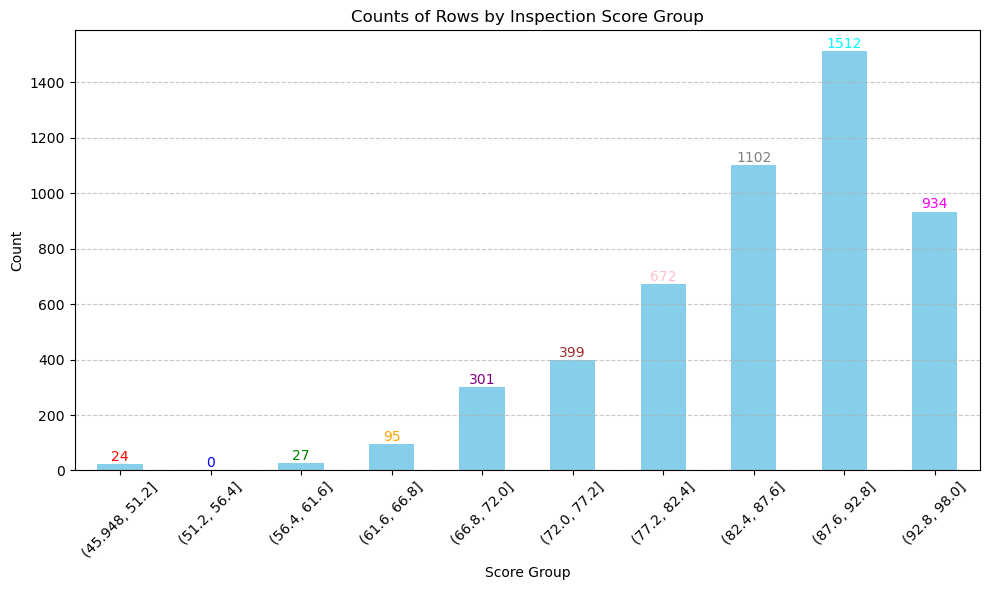

In [41]:
plt.figure(figsize=(10, 6))
ax = grouped_by_score_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of Rows by Inspection Score Group')
plt.xlabel('Score Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Define colors for annotations
annotation_colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']

# Annotate bars with their respective counts and adjust text color
for i, (count, color) in enumerate(zip(grouped_by_score_counts, annotation_colors)):
    ax.text(i, count + 0.2, str(count), ha='center', va='bottom', color=color)

plt.tight_layout()
plt.show()

* #### Let's look for the Highest score and Lowest with all information and the top 3 und bottom 3 also

In [42]:
max_inspection_score_row_index = df['inspection_score'].idxmax()
max_inspection_score_row = df.loc[max_inspection_score_row_index]
print(max_inspection_score_row)

business_id                                                          5854
business_city                                               San Francisco
business_state                                                         CA
inspection_date                                    02/27/2018 12:00:00 AM
inspection_score                                                     98.0
inspection_type                                     Routine - Unscheduled
violation_description    Unapproved or unmaintained equipment or utensils
risk_category                                                    Low Risk
public_health_effect                                    no immediate risk
Name: 357, dtype: object


In [43]:

df['inspection_date'] = pd.to_datetime(df['inspection_date'])
df['inspection_year'] = df['inspection_date'].dt.year
time_interval = df.loc[df.groupby('inspection_year')['inspection_score'].idxmax()]
time_interval = time_interval[['inspection_year', 'inspection_date', 'inspection_score', 'inspection_type']]

# Print the result
print(time_interval)


      inspection_year inspection_date  inspection_score        inspection_type
2588             2016      2016-11-03              98.0  Routine - Unscheduled
1178             2017      2017-10-30              98.0  Routine - Unscheduled
357              2018      2018-02-27              98.0  Routine - Unscheduled
529              2019      2019-06-19              98.0  Routine - Unscheduled


In [44]:
min_inspection_score_index = df['inspection_score'].idxmin()
min_inspection_score_row = df.loc[min_inspection_score_index]
print(min_inspection_score_row)

business_id                                                           1154
business_city                                                San Francisco
business_state                                                          CA
inspection_date                                        2019-03-27 00:00:00
inspection_score                                                      46.0
inspection_type                                      Routine - Unscheduled
violation_description    Inadequate and inaccessible handwashing facili...
risk_category                                                Moderate Risk
public_health_effect                                             Diggyness
inspection_year                                                       2019
Name: 122, dtype: object


In [45]:
df['inspection_date'] = pd.to_datetime(df['inspection_date'])

df['inspection_year'] = df['inspection_date'].dt.year

min_inspection_interval = df.loc[df.groupby('inspection_year')['inspection_score'].idxmin()]
min_inspection_interval = min_inspection_interval[['inspection_year', 'inspection_date', 'inspection_score', 'inspection_type']]

print(min_inspection_interval)



       inspection_year inspection_date  inspection_score  \
1024              2016      2016-11-01              67.0   
1156              2017      2017-04-07              60.0   
19044             2018      2018-09-14              51.0   
122               2019      2019-03-27              46.0   

             inspection_type  
1024   Routine - Unscheduled  
1156   Routine - Unscheduled  
19044  Routine - Unscheduled  
122    Routine - Unscheduled  


In [46]:
df_yearly= df.loc[df.groupby(['inspection_date', 'inspection_score', 'public_health_effect'])['inspection_score'].transform('count') > 1]
df_yearly

business_id  business_city business_state inspection_date  \
119           184  San Francisco             CA      2018-02-13   
122          1154  San Francisco             CA      2019-03-27   
123          1636  San Francisco             CA      2018-10-03   
173          7764  San Francisco             CA      2018-07-18   
213         59044  San Francisco             CA      2018-01-22   
...           ...            ...            ...             ...   
37851       71909  San Francisco             CA      2019-02-20   
38042       68442  San Francisco             CA      2019-02-21   
38045       67330  San Francisco             CA      2018-02-08   
38099       69769  San Francisco             CA      2017-06-13   
38116       71476  San Francisco             CA      2018-06-28   

       inspection_score        inspection_type  \
119                90.0  Routine - Unscheduled   
122                46.0  Routine - Unscheduled   
123                88.0  Routine - Unscheduled   
173                90.0  Routine - Unscheduled   
213                78.0  Routine - Unscheduled   
...                 ...                    ...   
37851              88.0  Routine - Unscheduled   
38042              88.0  Routine - Unscheduled   
38045              88.0  Routine - Unscheduled   
38099              88.0  Routine - Unscheduled   
38116              92.0  Routine - Unscheduled   

                                   violation_description  risk_category  \
119              Insufficient hot water or running water  Moderate Risk   
122    Inadequate and inaccessible handwashing facili...  Moderate Risk   
123    Wiping cloths not clean or properly stored or ...       Low Risk   
173         Unclean or degraded floors walls or ceilings       Low Risk   
213    Inadequate and inaccessible handwashing facili...  Moderate Risk   
...                                                  ...            ...   
37851       Unclean or degraded floors walls or ceilings       Low Risk   
38042                        Low risk vermin infestation       Low Risk   
38045       Unclean or degraded floors walls or ceilings       Low Risk   
38099  Inadequately cleaned or sanitized food contact...  Moderate Risk   
38116  Inadequately cleaned or sanitized food contact...  Moderate Risk   

      public_health_effect  inspection_year  
119              Diggyness             2018  
122              Diggyness             2019  
123      no immediate risk             2018  
173      no immediate risk             2018  
213              Diggyness             2018  
...                    ...              ...  
37851    no immediate risk             2019  
38042    no immediate risk             2019  
38045    no immediate risk             2018  
38099            Diggyness             2017  
38116            Diggyness             2018  

[3675 rows x 10 columns]

In [47]:
# Extracting year from inspection_date
df['inspection_year'] = pd.to_datetime(df['inspection_date']).dt.year

# Grouping by inspection_year
grouped_by_year = df.groupby('inspection_year')

# Getting the counts for each year group
grouped_by_year_counts = grouped_by_year.size()
grouped_by_year_counts

inspection_year
2016     382
2017    1655
2018    1619
2019    1410
dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


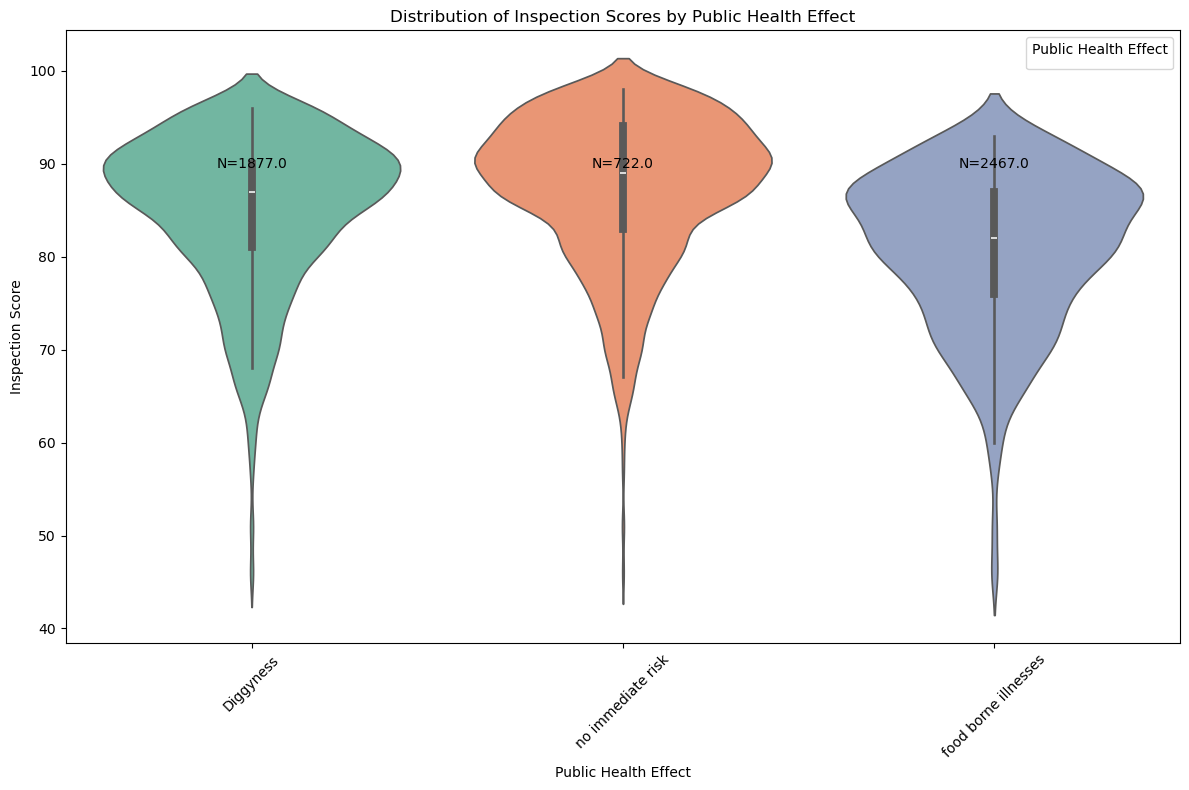

In [48]:
# Group by 'public_health_effect' and calculate summary statistics for 'inspection_score'
grouped_df = df.groupby('public_health_effect')['inspection_score'].describe().reset_index()

# Plot the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='public_health_effect', y='inspection_score', data=df, hue='public_health_effect', palette='Set2')
plt.title('Distribution of Inspection Scores by Public Health Effect')
plt.xlabel('Public Health Effect')
plt.ylabel('Inspection Score')
plt.xticks(rotation=45)
plt.legend(title='Public Health Effect')

# Adding annotations for number of inspections
for i, cat in enumerate(grouped_df['public_health_effect'].unique()):
    count = grouped_df[grouped_df['public_health_effect'] == cat]['count'].iloc[0]
    plt.text(i, 90, f'N={count}', ha='center', va='center')

plt.tight_layout()
plt.show()


* ## Inspeting more
* #### I want to count violation_description, and  put in which public_health_effect
* ####  where I want to see in which inspection they come and also add inspection_date
* #### For that I am selecting another column to get more information
* violation_description	risk_category	public_health_effect inspection_date	inspection_score
* for that I am doing some more steps, which are
* #### 1 Categorising Inspection score as responce_result where under 60 as Fail('No) and above 60 as Pass(Yes)
* #### 2 Counting response result as risk_category
* #### 3 Ploting separately and counting all inspection_scores with each risk_categoryy , they are Pass or not
* #### 4 giving ratings high risk as 0 , meditate risk as 3,5 and Low risk as 5 star
* #### 5 Looking with fail also they got ratings or not
* #### 6 what is the reason behind , even after fail they are having nice rating?
* it givs the result, in which (public_health_effect) , we can look this with violation_category
* #### Now doing one more time Data featuring in violation_category

In [49]:
df["responce_result"] = pd.to_numeric(df["inspection_score"], errors='coerce')
    
def advisor(inspection_score):
    if inspection_score < 60:
        return "NO"
    else:
        return "Yes"

df["responce_result"] = df["inspection_score"].apply(lambda x : advisor (x))
df

business_id  business_city business_state inspection_date  \
110          3649  San Francisco             CA      2017-12-06   
119           184  San Francisco             CA      2018-02-13   
122          1154  San Francisco             CA      2019-03-27   
123          1636  San Francisco             CA      2018-10-03   
173          7764  San Francisco             CA      2018-07-18   
...           ...            ...            ...             ...   
37965       67237  San Francisco             CA      2017-09-14   
38042       68442  San Francisco             CA      2019-02-21   
38045       67330  San Francisco             CA      2018-02-08   
38099       69769  San Francisco             CA      2017-06-13   
38116       71476  San Francisco             CA      2018-06-28   

       inspection_score        inspection_type  \
110                82.0  Routine - Unscheduled   
119                90.0  Routine - Unscheduled   
122                46.0  Routine - Unscheduled   
123                88.0  Routine - Unscheduled   
173                90.0  Routine - Unscheduled   
...                 ...                    ...   
37965              84.0  Routine - Unscheduled   
38042              88.0  Routine - Unscheduled   
38045              88.0  Routine - Unscheduled   
38099              88.0  Routine - Unscheduled   
38116              92.0  Routine - Unscheduled   

                                   violation_description  risk_category  \
110                     Moderate risk vermin infestation  Moderate Risk   
119              Insufficient hot water or running water  Moderate Risk   
122    Inadequate and inaccessible handwashing facili...  Moderate Risk   
123    Wiping cloths not clean or properly stored or ...       Low Risk   
173         Unclean or degraded floors walls or ceilings       Low Risk   
...                                                  ...            ...   
37965       Unclean or degraded floors walls or ceilings       Low Risk   
38042                        Low risk vermin infestation       Low Risk   
38045       Unclean or degraded floors walls or ceilings       Low Risk   
38099  Inadequately cleaned or sanitized food contact...  Moderate Risk   
38116  Inadequately cleaned or sanitized food contact...  Moderate Risk   

      public_health_effect  inspection_year responce_result  
110              Diggyness             2017             Yes  
119              Diggyness             2018             Yes  
122              Diggyness             2019              NO  
123      no immediate risk             2018             Yes  
173      no immediate risk             2018             Yes  
...                    ...              ...             ...  
37965    no immediate risk             2017             Yes  
38042    no immediate risk             2019             Yes  
38045    no immediate risk             2018             Yes  
38099            Diggyness             2017             Yes  
38116            Diggyness             2018             Yes  

[5066 rows x 11 columns]

#### 2 Counting response result as risk_category 

In [50]:
responce_count = df.groupby('responce_result').size().reset_index(name='count')
risck_responce = df.groupby(['risk_category','responce_result']).apply(list).reset_index()
display(risck_responce)


risk_category responce_result  \
0      High Risk              NO   
1      High Risk             Yes   
2       Low Risk              NO   
3       Low Risk             Yes   
4  Moderate Risk              NO   
5  Moderate Risk             Yes   

                                                   0  
0  [business_id, business_city, business_state, i...  
1  [business_id, business_city, business_state, i...  
2  [business_id, business_city, business_state, i...  
3  [business_id, business_city, business_state, i...  
4  [business_id, business_city, business_state, i...  
5  [business_id, business_city, business_state, i...

 #### 3 Ploting separately and counting all inspection_scores with each risk_categoryy , they are Pass or not
 i have to redo it , because i have all this value there

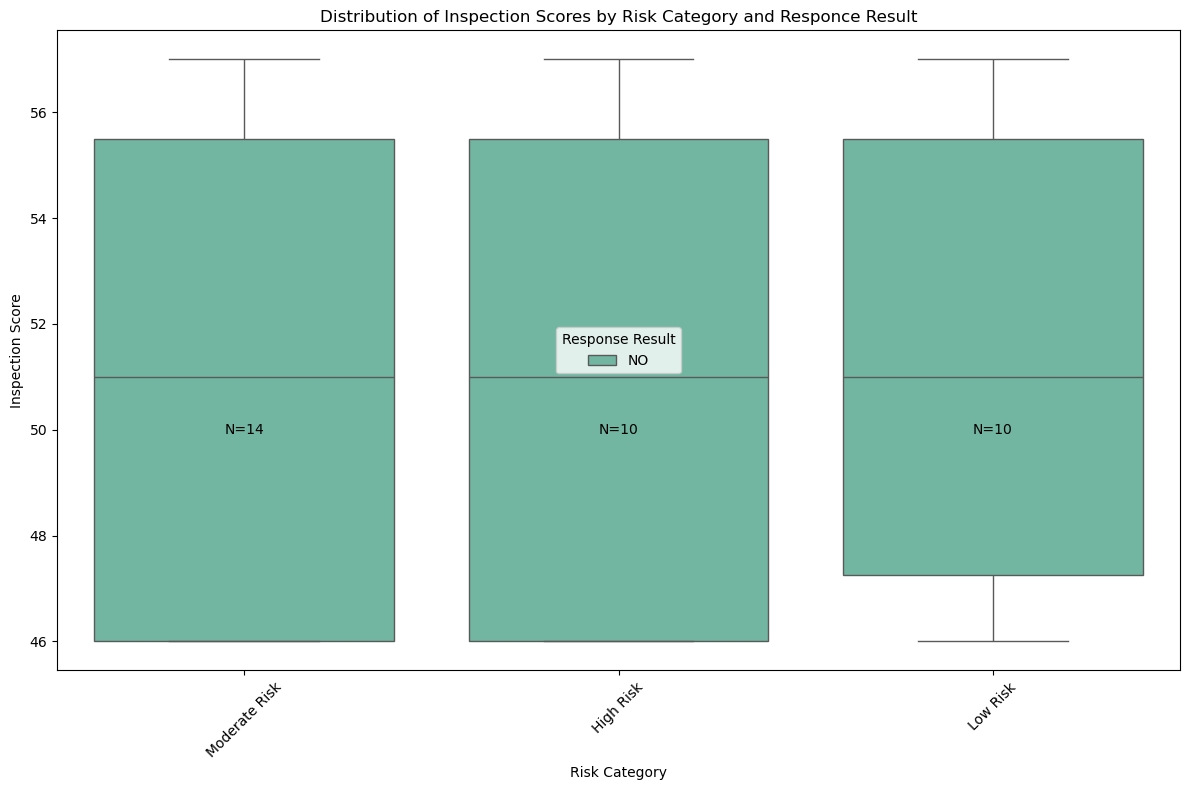

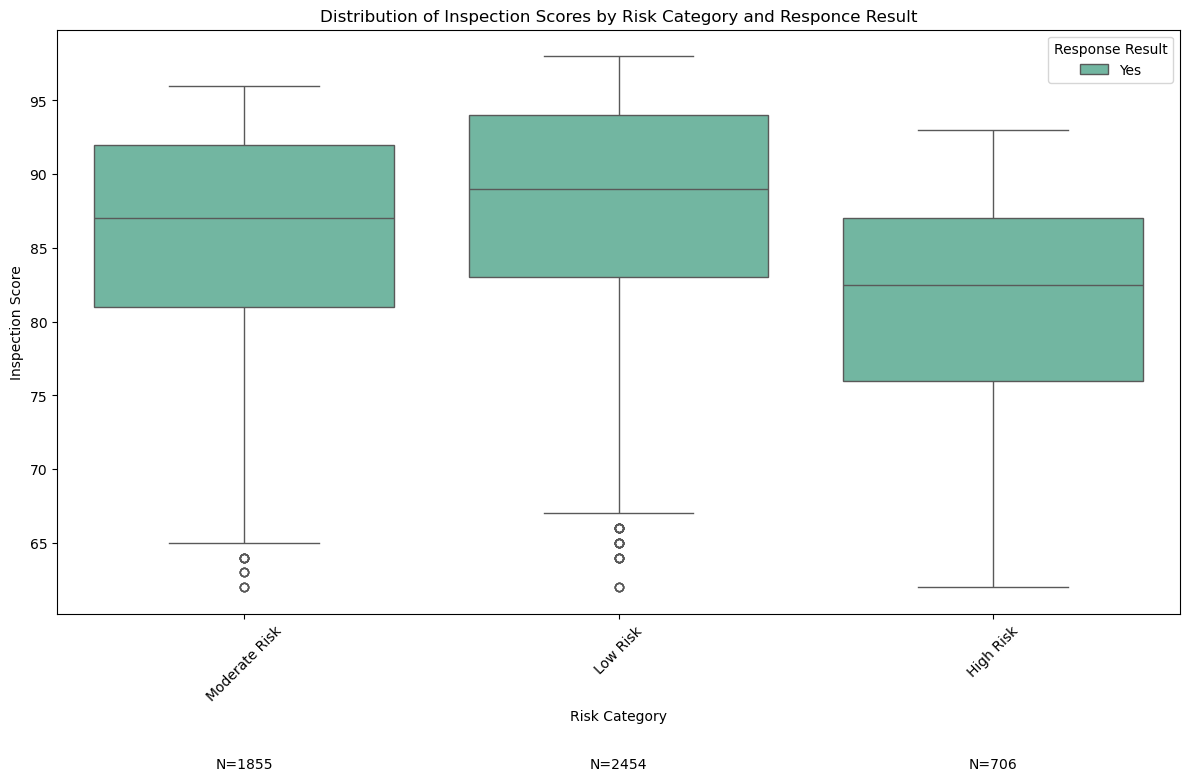

In [31]:
filtered_df = df[(df['inspection_score'] < 60) & df['risk_category'].notnull()]
plt.figure(figsize=(12, 8))

# Plot for inspection scores < 60
sns.boxplot(x='risk_category', y='inspection_score', hue='responce_result', data=filtered_df, palette='Set2')
plt.title('Distribution of Inspection Scores by Risk Category and Responce Result')
plt.xlabel('Risk Category')
plt.ylabel('Inspection Score')
plt.legend(title='Response Result')
plt.xticks(rotation=45)

# Adding annotations for number of inspections
for i, cat in enumerate(filtered_df['risk_category'].unique()):
    count = filtered_df[filtered_df['risk_category'] == cat]['inspection_score'].count()
    plt.text(i, 50, f'N={count}', ha='center', va='center')

plt.tight_layout()
plt.show()

filtered_df_1 = df[(df['inspection_score'] > 60) & df['risk_category'].notnull()]
plt.figure(figsize=(12, 8))

# Plot for inspection scores < 60
sns.boxplot(x='risk_category', y='inspection_score', hue='responce_result', data=filtered_df_1, palette='Set2')
plt.title('Distribution of Inspection Scores by Risk Category and Responce Result')
plt.xlabel('Risk Category')
plt.ylabel('Inspection Score')
plt.legend(title='Response Result')
plt.xticks(rotation=45)

# Adding annotations for number of inspections
for i, cat in enumerate(filtered_df_1['risk_category'].unique()):
    count = filtered_df_1[filtered_df_1['risk_category'] == cat]['inspection_score'].count()
    plt.text(i, 50, f'N={count}', ha='center', va='center')

plt.tight_layout()
plt.show()


#### 4 giving ratings high risk as 0 , meditate risk as 3,5 and Low risk as 5 star

In [51]:
df["ratings"] = pd.to_numeric(df["risk_category"], errors='coerce')

def advisor(risk_category):
    if risk_category == 'High Risk':
        return "0"
    elif risk_category in ['Moderate Risk']:
        return "3.5 "
    else:
        return "5 "

df["ratings"] = df["risk_category"].apply(lambda x : advisor (x))
df

business_id  business_city business_state inspection_date  \
110          3649  San Francisco             CA      2017-12-06   
119           184  San Francisco             CA      2018-02-13   
122          1154  San Francisco             CA      2019-03-27   
123          1636  San Francisco             CA      2018-10-03   
173          7764  San Francisco             CA      2018-07-18   
...           ...            ...            ...             ...   
37965       67237  San Francisco             CA      2017-09-14   
38042       68442  San Francisco             CA      2019-02-21   
38045       67330  San Francisco             CA      2018-02-08   
38099       69769  San Francisco             CA      2017-06-13   
38116       71476  San Francisco             CA      2018-06-28   

       inspection_score        inspection_type  \
110                82.0  Routine - Unscheduled   
119                90.0  Routine - Unscheduled   
122                46.0  Routine - Unscheduled   
123                88.0  Routine - Unscheduled   
173                90.0  Routine - Unscheduled   
...                 ...                    ...   
37965              84.0  Routine - Unscheduled   
38042              88.0  Routine - Unscheduled   
38045              88.0  Routine - Unscheduled   
38099              88.0  Routine - Unscheduled   
38116              92.0  Routine - Unscheduled   

                                   violation_description  risk_category  \
110                     Moderate risk vermin infestation  Moderate Risk   
119              Insufficient hot water or running water  Moderate Risk   
122    Inadequate and inaccessible handwashing facili...  Moderate Risk   
123    Wiping cloths not clean or properly stored or ...       Low Risk   
173         Unclean or degraded floors walls or ceilings       Low Risk   
...                                                  ...            ...   
37965       Unclean or degraded floors walls or ceilings       Low Risk   
38042                        Low risk vermin infestation       Low Risk   
38045       Unclean or degraded floors walls or ceilings       Low Risk   
38099  Inadequately cleaned or sanitized food contact...  Moderate Risk   
38116  Inadequately cleaned or sanitized food contact...  Moderate Risk   

      public_health_effect  inspection_year responce_result ratings  
110              Diggyness             2017             Yes    3.5   
119              Diggyness             2018             Yes    3.5   
122              Diggyness             2019              NO    3.5   
123      no immediate risk             2018             Yes      5   
173      no immediate risk             2018             Yes      5   
...                    ...              ...             ...     ...  
37965    no immediate risk             2017             Yes      5   
38042    no immediate risk             2019             Yes      5   
38045    no immediate risk             2018             Yes      5   
38099            Diggyness             2017             Yes    3.5   
38116            Diggyness             2018             Yes    3.5   

[5066 rows x 12 columns]

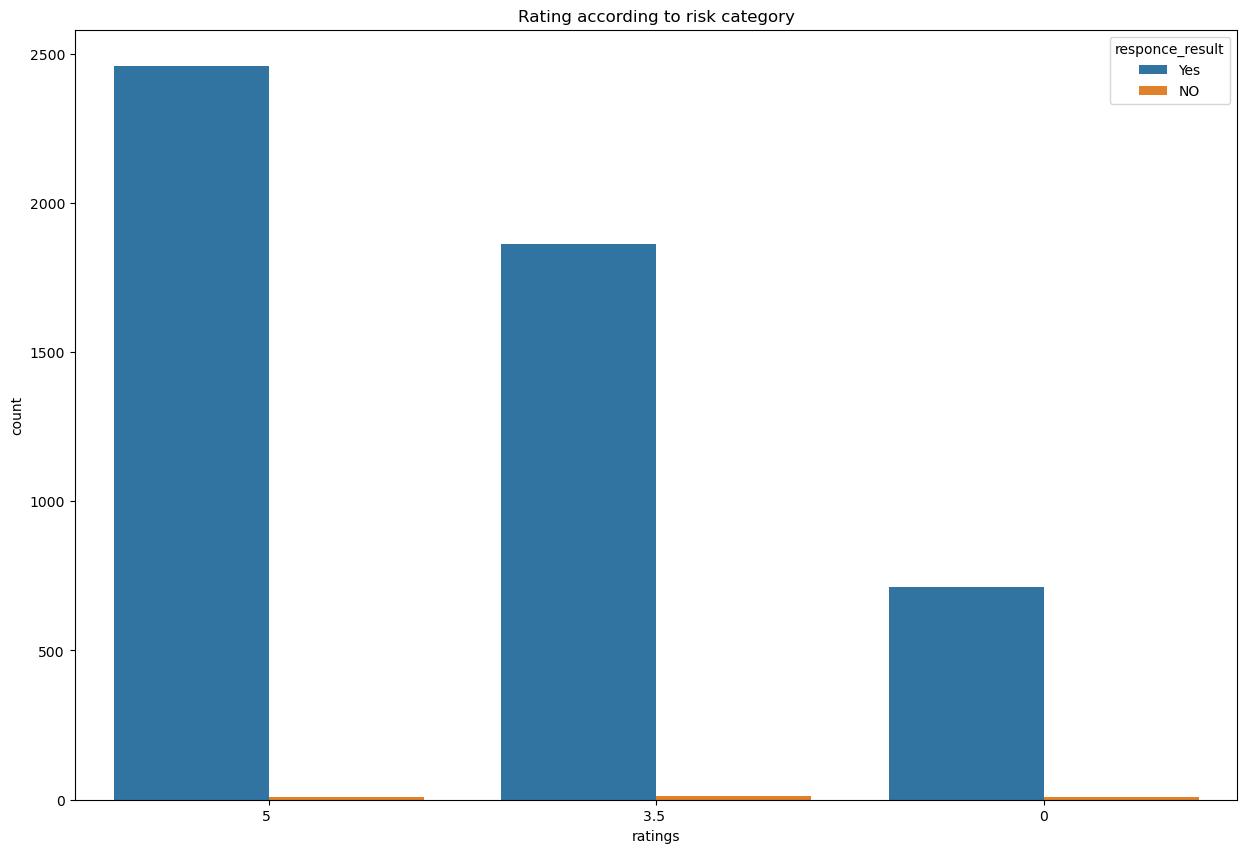

In [52]:
plt.figure(figsize=(15,10))
sns.countplot(x='ratings', hue='responce_result', data=df, order=df['ratings'].value_counts().index)
plt.title('Rating according to risk category')
plt.show()

In [53]:

response_counts = df.groupby('ratings')['responce_result'].value_counts().unstack().fillna(0)

print(response_counts)


responce_result  NO   Yes
ratings                  
0                10   712
3.5              14  1863
5                10  2457


* #### 6 Ploting it with 2 different Plot No and Yes even they got pass

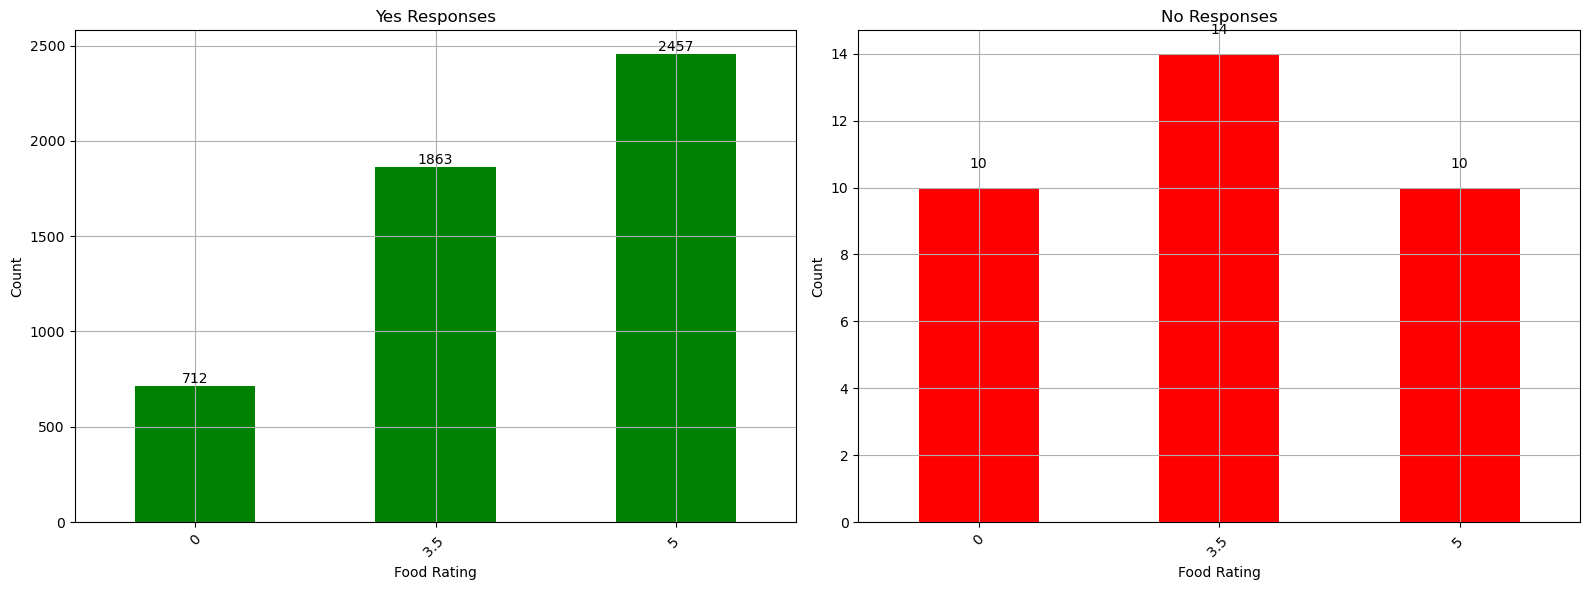

In [35]:

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting 'Yes' responses
response_counts['Yes'].plot(kind='bar', ax=axes[0], color='green')
axes[0].set_title('Yes Responses')
axes[0].set_xlabel('Food Rating')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(response_counts.index, rotation=45)
axes[0].grid(True)

# Add count labels on the bars for 'Yes' responses
for index, value in enumerate(response_counts['Yes']):
    axes[0].text(index, value + 0.5, str(value), ha='center', va='bottom')

# Plotting 'No' responses
response_counts['NO'].plot(kind='bar', ax=axes[1], color='red')
axes[1].set_title('No Responses')
axes[1].set_xlabel('Food Rating')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(response_counts.index, rotation=45)
axes[1].grid(True)

# Add count labels on the bars for 'No' responses
for index, value in enumerate(response_counts['NO']):
    axes[1].text(index, value + 0.5, str(value), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


* #### 7 what is the reason behind , even after fail they are having nice rating?
* it givs the result, in which (public_health_effect) , we can look this with violation_category
* For that I am talking time and Categorising all diffrent violation_category in 9 different violation_category so ,
   it is easy to get bette clean feture.

* #### Now doing one more time Data featuring in violation_category

## * Crating 'violation_category'

In [54]:
def advisor(violation_description):
    if violation_description in ['Unclean or degraded floors walls or ceilings',
                                 'Inadequately cleaned or sanitized food contact surfaces',
                                 'Wiping cloths not clean or properly stored or inadequate sanitizer',
                                 'Unclean nonfood contact surfaces',
                                 'Unclean or unsanitary food contact surfaces',
                                 'Unclean hands or improper use of gloves',
                                 'Unclean unmaintained or improperly constructed toilet facilities',
                                 'Unsanitary employee garments hair or nails']:
        return "unclean"
    elif violation_description in ['Unapproved or unmaintained equipment or utensils',
                                   'Inadequate and inaccessible handwashing facilities',
                                   'Inadequate warewashing facilities or equipment',
                                   'No thermometers or uncalibrated thermometers']:
        return "lack of equipment"
    elif violation_description in ['Moderate risk food holding temperature',
                                   'High risk food holding temperature',
                                   'Insufficient hot water or running water',
                                   'Improper cooling methods',
                                   'No hot water or running water']:
        return "Under Temperature"
    elif violation_description in ['Moderate risk vermin infestation',
                                   'Foods not protected from contamination',
                                   'Low risk vermin infestation',
                                   'Contaminated or adulterated food',
                                   'High risk vermin infestation',
                                   'Sewage or wastewater contamination']:
        return "Contaminated"
    elif violation_description in ['Improper food storage',
                                   'Improper storage of equipment utensils or linens',
                                   'Improper thawing methods',
                                   'Improper storage use or identification of toxic substances',
                                   'Inadequate dressing rooms or improper storage of personal items',
                                   'Reservice of previously served foods',
                                   'No person in charge of food facility',
                                   'Unapproved living quarters in food facility',
                                   'Unapproved food source',
                                   'Other moderate risk violation',
                                   'Other high risk violation']:
        return "Unmanage"
    elif violation_description in ['Food safety certificate or food handler card not available',
                                   'Inadequate food safety knowledge or lack of certified food safety manager',
                                   'Permit license or inspection report not posted',
                                   'Other low risk violation',
                                   'Noncompliance with HAACP plan or variance',
                                   'Improper food labeling or menu misrepresentation',
                                   'Inadequate procedures or records for time as a public health control',
                                   'Inadequate or unsanitary refuse containers or area or no garbage service',
                                   'No plan review or Building Permit',
                                   'Unauthorized or unsafe use of time as a public health control measure',
                                   'Worker safety hazards',
                                   'Non service animal',
                                   'Unpermitted food facility',
                                   'Inadequate HACCP plan record keeping']:
        return "Lack Certificate"
    elif violation_description in ['Improper or defective plumbing', 'Inadequate ventilation or lighting']:
        return "UnderMaintenance"
    elif violation_description in ['Employee eating or smoking',
                                   'Food in poor condition',
                                   'Improper reheating of food',
                                   'Noncompliance with shell fish tags or display',
                                   'Inadequate sewage or wastewater disposal']:
        return "untrained worker"
    elif violation_description in ['Low Risk', 'Moderate Risk']:
        return "expire-food reserve"
    else:
        return "not convinced"

df["violation_Category"] = df["violation_description"].apply(lambda x: advisor(x))
df

business_id  business_city business_state inspection_date  \
110          3649  San Francisco             CA      2017-12-06   
119           184  San Francisco             CA      2018-02-13   
122          1154  San Francisco             CA      2019-03-27   
123          1636  San Francisco             CA      2018-10-03   
173          7764  San Francisco             CA      2018-07-18   
...           ...            ...            ...             ...   
37965       67237  San Francisco             CA      2017-09-14   
38042       68442  San Francisco             CA      2019-02-21   
38045       67330  San Francisco             CA      2018-02-08   
38099       69769  San Francisco             CA      2017-06-13   
38116       71476  San Francisco             CA      2018-06-28   

       inspection_score        inspection_type  \
110                82.0  Routine - Unscheduled   
119                90.0  Routine - Unscheduled   
122                46.0  Routine - Unscheduled   
123                88.0  Routine - Unscheduled   
173                90.0  Routine - Unscheduled   
...                 ...                    ...   
37965              84.0  Routine - Unscheduled   
38042              88.0  Routine - Unscheduled   
38045              88.0  Routine - Unscheduled   
38099              88.0  Routine - Unscheduled   
38116              92.0  Routine - Unscheduled   

                                   violation_description  risk_category  \
110                     Moderate risk vermin infestation  Moderate Risk   
119              Insufficient hot water or running water  Moderate Risk   
122    Inadequate and inaccessible handwashing facili...  Moderate Risk   
123    Wiping cloths not clean or properly stored or ...       Low Risk   
173         Unclean or degraded floors walls or ceilings       Low Risk   
...                                                  ...            ...   
37965       Unclean or degraded floors walls or ceilings       Low Risk   
38042                        Low risk vermin infestation       Low Risk   
38045       Unclean or degraded floors walls or ceilings       Low Risk   
38099  Inadequately cleaned or sanitized food contact...  Moderate Risk   
38116  Inadequately cleaned or sanitized food contact...  Moderate Risk   

      public_health_effect  inspection_year responce_result ratings  \
110              Diggyness             2017             Yes    3.5    
119              Diggyness             2018             Yes    3.5    
122              Diggyness             2019              NO    3.5    
123      no immediate risk             2018             Yes      5    
173      no immediate risk             2018             Yes      5    
...                    ...              ...             ...     ...   
37965    no immediate risk             2017             Yes      5    
38042    no immediate risk             2019             Yes      5    
38045    no immediate risk             2018             Yes      5    
38099            Diggyness             2017             Yes    3.5    
38116            Diggyness             2018             Yes    3.5    

      violation_Category  
110         Contaminated  
119    Under Temperature  
122    lack of equipment  
123              unclean  
173              unclean  
...                  ...  
37965            unclean  
38042       Contaminated  
38045            unclean  
38099            unclean  
38116            unclean  

[5066 rows x 13 columns]

#### I am exporting it as csv because i want to do Tableau visulisation

In [55]:
df.to_csv('inspection_score.csv')

In [56]:
#count violation_Category
df["violation_Category"].value_counts()

violation_Category
unclean              1556
Contaminated          807
lack of equipment     769
Under Temperature     753
Lack Certificate      476
Unmanage              472
UnderMaintenance      144
untrained worker       85
not convinced           4
Name: count, dtype: int64

In [57]:
df["responce_result"].value_counts()

responce_result
Yes    5032
NO       34
Name: count, dtype: int64

responce_result = no 

In [58]:
#no_responses = df[df['responce_result'] == 'NO'][['ratings', 'violation_Category']]
#print(no_responses)


## * grouping violation _category with rating 
* And Look at the coont value and plot it also in garph

In [59]:
grouped_rating_violation = df.groupby(['ratings', 'violation_Category']).size().reset_index(name='count')
print(grouped_rating_violation)


   ratings violation_Category  count
0        0       Contaminated    132
1        0   Lack Certificate      4
2        0  Under Temperature    311
3        0           Unmanage      5
4        0            unclean    256
5        0   untrained worker     14
6     3.5        Contaminated    489
7     3.5    Lack Certificate    165
8     3.5   Under Temperature    442
9     3.5            Unmanage     88
10    3.5   lack of equipment    283
11    3.5             unclean    339
12    3.5    untrained worker     71
13      5        Contaminated    186
14      5    Lack Certificate    307
15      5    UnderMaintenance    144
16      5            Unmanage    379
17      5   lack of equipment    486
18      5       not convinced      4
19      5             unclean    961


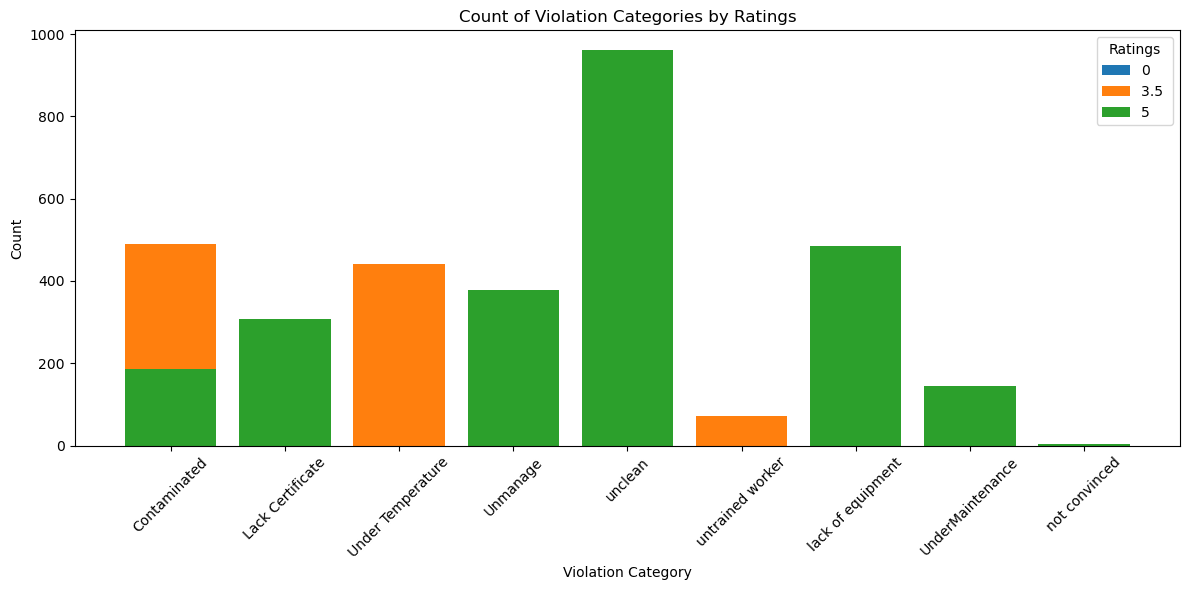

In [60]:

# Plotting
plt.figure(figsize=(12, 6))
for rating in grouped_rating_violation['ratings'].unique():
    subset = grouped_rating_violation[grouped_rating_violation['ratings'] == rating]
    plt.bar(subset['violation_Category'], subset['count'], label=rating)

plt.xlabel('Violation Category')
plt.ylabel('Count')
plt.title('Count of Violation Categories by Ratings')
plt.xticks(rotation=45)
plt.legend(title='Ratings')
plt.tight_layout()
plt.show()


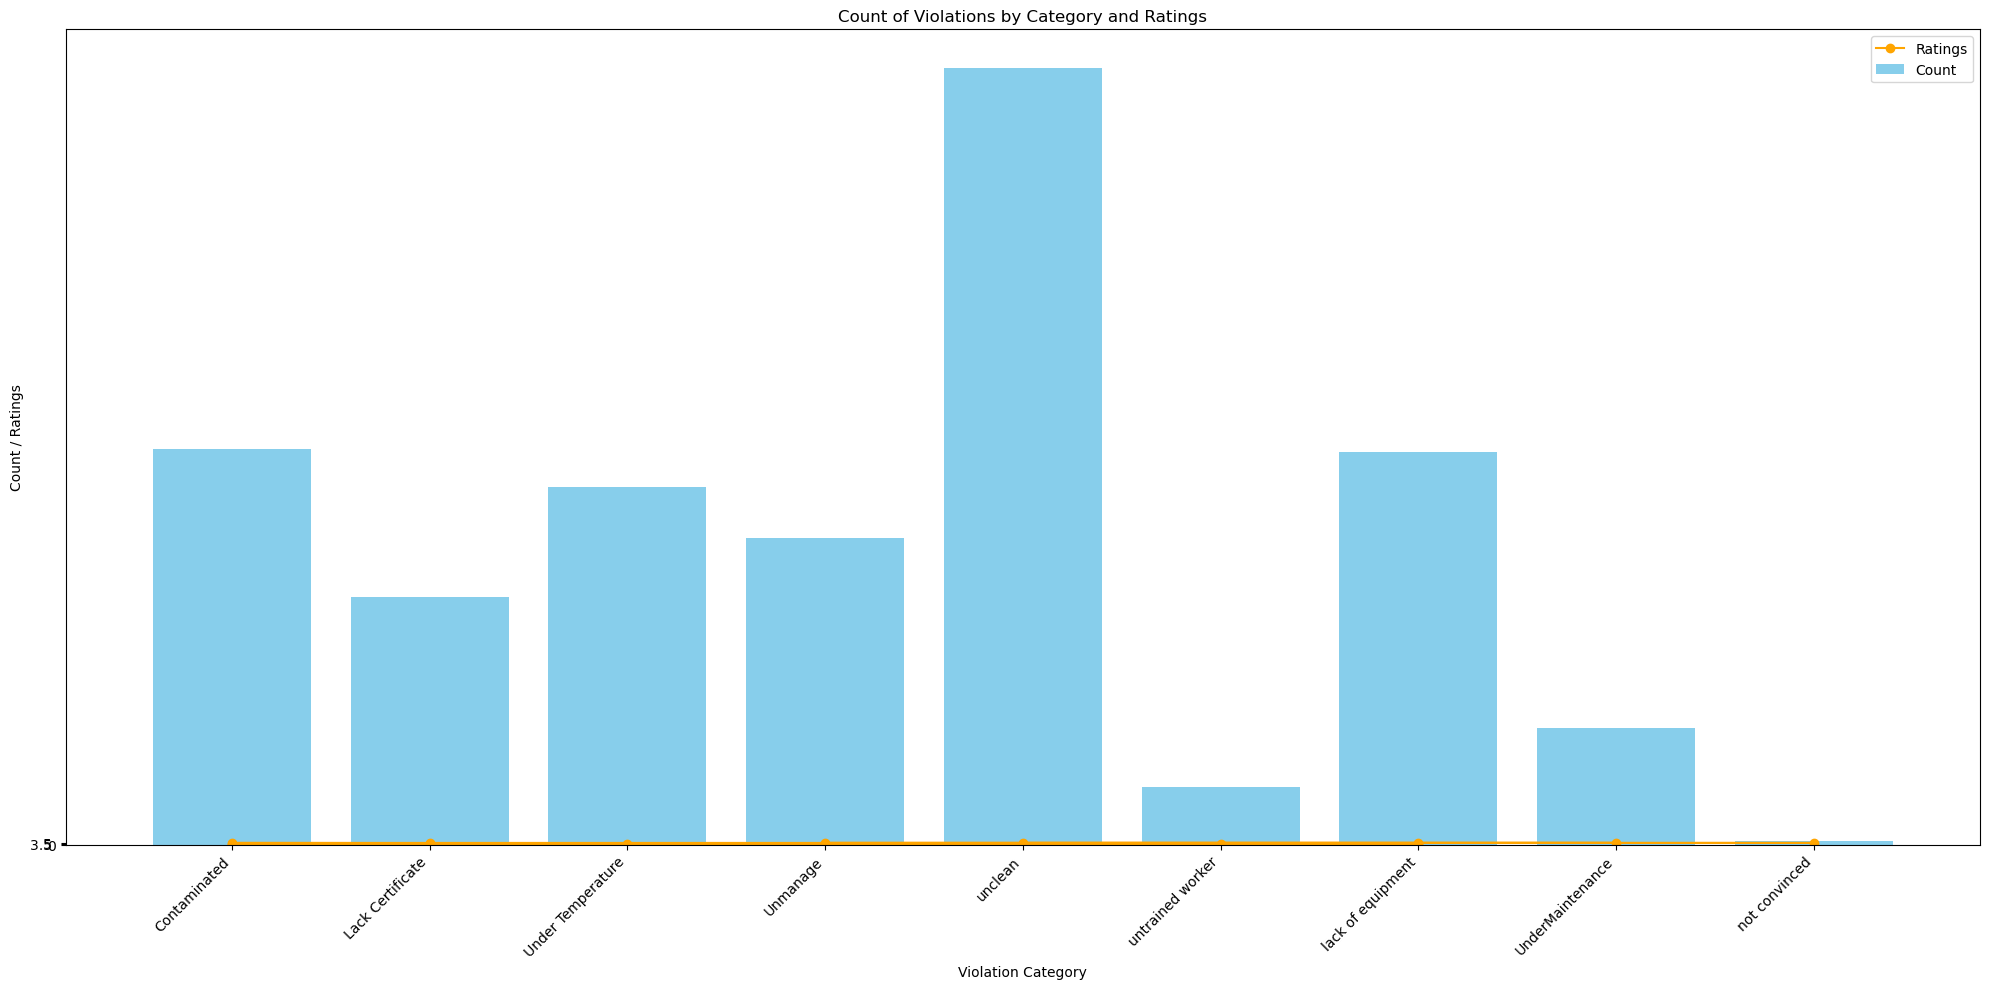

In [61]:

df1 = pd.DataFrame(grouped_rating_violation)

# Plot
plt.figure(figsize=(20, 10))  
plt.bar(df1['violation_Category'], df1['count'], color='skyblue', label='Count')
plt.plot(df1['violation_Category'], df1['ratings'], marker='o', color='orange', label='Ratings')
plt.xlabel('Violation Category')
plt.ylabel('Count / Ratings')
plt.title('Count of Violations by Category and Ratings')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

plt.show()

## * grouping violation _category with response also
* Look at the count value and plot it also in the graph

In [62]:
#grouped_responce_violation = no_responses.groupby(['responce_result', 'violation_Category']).size().reset_index(name='count')
#print(grouped_responce_violation)


## Now we are in the final why even they got No or they fail but also have nice rating 

* For that I am taking -responce_result,ratings,violation_Category,risk_category(execptional. because rating comes under it) 

In [63]:
grouped_responce_violation = df.groupby(['responce_result', 'violation_Category']).size().reset_index(name='count')

print(grouped_responce_violation)


   responce_result violation_Category  count
0               NO       Contaminated      4
1               NO   Lack Certificate      4
2               NO  Under Temperature      5
3               NO           Unmanage      5
4               NO  lack of equipment      6
5               NO            unclean      8
6               NO   untrained worker      2
7              Yes       Contaminated    803
8              Yes   Lack Certificate    472
9              Yes  Under Temperature    748
10             Yes   UnderMaintenance    144
11             Yes           Unmanage    467
12             Yes  lack of equipment    763
13             Yes      not convinced      4
14             Yes            unclean   1548
15             Yes   untrained worker     83


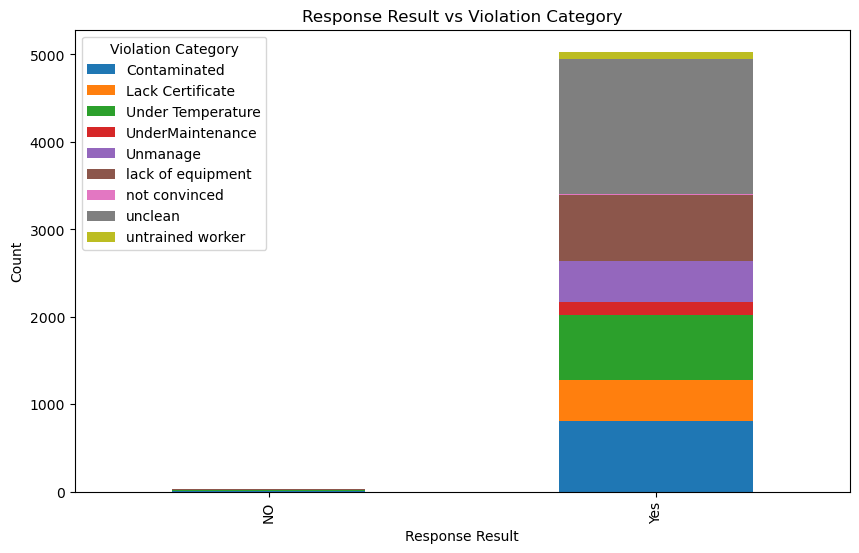

In [64]:

grouped_responce_violation = df.groupby(['responce_result', 'violation_Category']).size().reset_index(name='count')


pivot_table = grouped_responce_violation.pivot(index='responce_result', columns='violation_Category', values='count')

# Create a bar plot
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))  # Enlarged size
plt.xlabel('Response Result')
plt.ylabel('Count')
plt.title('Response Result vs Violation Category')
plt.legend(title='Violation Category')
plt.show()

#### Final Step to get result 
## Final we want to se result of responce_result, ratings,violation_Category
* From this we can se even they got under 60 mask , they got nice rating because,
  the resurent are in moderate risk and low risk, so they got nice rating, so we can see which violation they are in.

In [65]:
df.columns

Index(['business_id', 'business_city', 'business_state', 'inspection_date',
       'inspection_score', 'inspection_type', 'violation_description',
       'risk_category', 'public_health_effect', 'inspection_year',
       'responce_result', 'ratings', 'violation_Category'],
      dtype='object')

In [66]:
final_result= df.groupby(['responce_result','ratings','violation_Category']).size().reset_index(name='count')
final_result

responce_result ratings violation_Category  count
0               NO       0       Contaminated      1
1               NO       0  Under Temperature      4
2               NO       0            unclean      5
3               NO    3.5        Contaminated      3
4               NO    3.5    Lack Certificate      3
5               NO    3.5   Under Temperature      1
6               NO    3.5            Unmanage      3
7               NO    3.5   lack of equipment      2
8               NO    3.5    untrained worker      2
9               NO      5    Lack Certificate      1
10              NO      5            Unmanage      2
11              NO      5   lack of equipment      4
12              NO      5             unclean      3
13             Yes       0       Contaminated    131
14             Yes       0   Lack Certificate      4
15             Yes       0  Under Temperature    307
16             Yes       0           Unmanage      5
17             Yes       0            unclean    251
18             Yes       0   untrained worker     14
19             Yes    3.5        Contaminated    486
20             Yes    3.5    Lack Certificate    162
21             Yes    3.5   Under Temperature    441
22             Yes    3.5            Unmanage     85
23             Yes    3.5   lack of equipment    281
24             Yes    3.5             unclean    339
25             Yes    3.5    untrained worker     69
26             Yes      5        Contaminated    186
27             Yes      5    Lack Certificate    306
28             Yes      5    UnderMaintenance    144
29             Yes      5            Unmanage    377
30             Yes      5   lack of equipment    482
31             Yes      5       not convinced      4
32             Yes      5             unclean    958

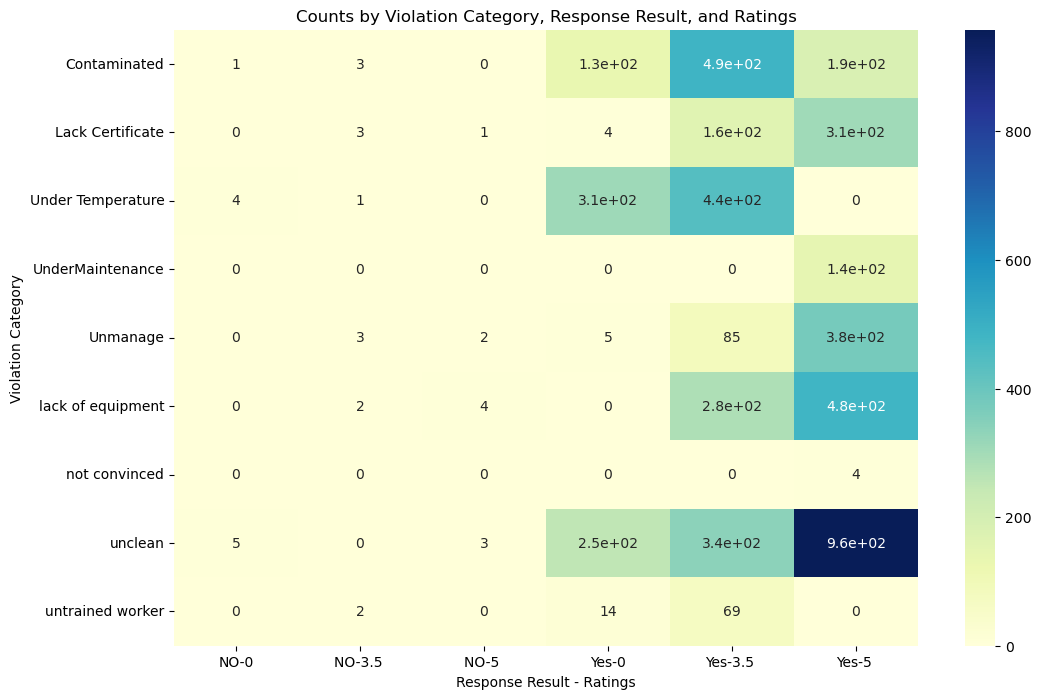

In [67]:

# Pivot the DataFrame for better visualization
pivot_df = final_result.pivot_table(index='violation_Category', columns=['responce_result', 'ratings'], values='count', fill_value=0)

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cmap="YlGnBu")
plt.title('Counts by Violation Category, Response Result, and Ratings')
plt.xlabel('Response Result - Ratings')
plt.ylabel('Violation Category')
plt.show()


* I want to see top 3 inspection_score with all column

In [68]:
# DataFrame by 'inspection_score' 
df_sorted = df.sort_values(by='inspection_score', ascending=True)

top_3_low_scores = df_sorted.head(3)

# Create a DataFrame with selected columns
top_3_inspection_data = pd.DataFrame({
    'Business ID': top_3_low_scores['business_id'],
    'City': top_3_low_scores['business_city'],
    'State': top_3_low_scores['business_state'],
    'Inspection Date': top_3_low_scores['inspection_date'],
    'Inspection Score': top_3_low_scores['inspection_score'],
    'Inspection Type': top_3_low_scores['inspection_type'],
    'Violation Description': top_3_low_scores['violation_description'],
    'Risk Category': top_3_low_scores['risk_category'],
    'Public Health Effect': top_3_low_scores['public_health_effect'],
    'Inspection Year': top_3_low_scores['inspection_year'],
    'Response Result': top_3_low_scores['responce_result'],
    'Ratings': top_3_low_scores['ratings'],
    'Violation Category': top_3_low_scores['violation_Category']
})

display(top_3_inspection_data)


Business ID           City State Inspection Date  Inspection Score  \
12852        1154  San Francisco    CA      2019-03-27              46.0   
122          1154  San Francisco    CA      2019-03-27              46.0   
3043         1154  San Francisco    CA      2019-03-27              46.0   

             Inspection Type  \
12852  Routine - Unscheduled   
122    Routine - Unscheduled   
3043   Routine - Unscheduled   

                                   Violation Description  Risk Category  \
12852        Unclean or unsanitary food contact surfaces      High Risk   
122    Inadequate and inaccessible handwashing facili...  Moderate Risk   
3043                  High risk food holding temperature      High Risk   

       Public Health Effect  Inspection Year Response Result Ratings  \
12852  food borne illnesses             2019              NO       0   
122               Diggyness             2019              NO    3.5    
3043   food borne illnesses             2019              NO       0   

      Violation Category  
12852            unclean  
122    lack of equipment  
3043   Under Temperature

### Now let's proceed with the prediction.
* Before that, we'll reload the data and examine all numerical and categorical values and columns.
* Additionally, we'll explore the correlation between them.,

In [69]:
df

business_id  business_city business_state inspection_date  \
110          3649  San Francisco             CA      2017-12-06   
119           184  San Francisco             CA      2018-02-13   
122          1154  San Francisco             CA      2019-03-27   
123          1636  San Francisco             CA      2018-10-03   
173          7764  San Francisco             CA      2018-07-18   
...           ...            ...            ...             ...   
37965       67237  San Francisco             CA      2017-09-14   
38042       68442  San Francisco             CA      2019-02-21   
38045       67330  San Francisco             CA      2018-02-08   
38099       69769  San Francisco             CA      2017-06-13   
38116       71476  San Francisco             CA      2018-06-28   

       inspection_score        inspection_type  \
110                82.0  Routine - Unscheduled   
119                90.0  Routine - Unscheduled   
122                46.0  Routine - Unscheduled   
123                88.0  Routine - Unscheduled   
173                90.0  Routine - Unscheduled   
...                 ...                    ...   
37965              84.0  Routine - Unscheduled   
38042              88.0  Routine - Unscheduled   
38045              88.0  Routine - Unscheduled   
38099              88.0  Routine - Unscheduled   
38116              92.0  Routine - Unscheduled   

                                   violation_description  risk_category  \
110                     Moderate risk vermin infestation  Moderate Risk   
119              Insufficient hot water or running water  Moderate Risk   
122    Inadequate and inaccessible handwashing facili...  Moderate Risk   
123    Wiping cloths not clean or properly stored or ...       Low Risk   
173         Unclean or degraded floors walls or ceilings       Low Risk   
...                                                  ...            ...   
37965       Unclean or degraded floors walls or ceilings       Low Risk   
38042                        Low risk vermin infestation       Low Risk   
38045       Unclean or degraded floors walls or ceilings       Low Risk   
38099  Inadequately cleaned or sanitized food contact...  Moderate Risk   
38116  Inadequately cleaned or sanitized food contact...  Moderate Risk   

      public_health_effect  inspection_year responce_result ratings  \
110              Diggyness             2017             Yes    3.5    
119              Diggyness             2018             Yes    3.5    
122              Diggyness             2019              NO    3.5    
123      no immediate risk             2018             Yes      5    
173      no immediate risk             2018             Yes      5    
...                    ...              ...             ...     ...   
37965    no immediate risk             2017             Yes      5    
38042    no immediate risk             2019             Yes      5    
38045    no immediate risk             2018             Yes      5    
38099            Diggyness             2017             Yes    3.5    
38116            Diggyness             2018             Yes    3.5    

      violation_Category  
110         Contaminated  
119    Under Temperature  
122    lack of equipment  
123              unclean  
173              unclean  
...                  ...  
37965            unclean  
38042       Contaminated  
38045            unclean  
38099            unclean  
38116            unclean  

[5066 rows x 13 columns]

#### Corelation in numerical column

In [70]:
categorical_columns = df.select_dtypes(include=['object'])
categorical_columns

business_id  business_city business_state        inspection_type  \
110          3649  San Francisco             CA  Routine - Unscheduled   
119           184  San Francisco             CA  Routine - Unscheduled   
122          1154  San Francisco             CA  Routine - Unscheduled   
123          1636  San Francisco             CA  Routine - Unscheduled   
173          7764  San Francisco             CA  Routine - Unscheduled   
...           ...            ...            ...                    ...   
37965       67237  San Francisco             CA  Routine - Unscheduled   
38042       68442  San Francisco             CA  Routine - Unscheduled   
38045       67330  San Francisco             CA  Routine - Unscheduled   
38099       69769  San Francisco             CA  Routine - Unscheduled   
38116       71476  San Francisco             CA  Routine - Unscheduled   

                                   violation_description  risk_category  \
110                     Moderate risk vermin infestation  Moderate Risk   
119              Insufficient hot water or running water  Moderate Risk   
122    Inadequate and inaccessible handwashing facili...  Moderate Risk   
123    Wiping cloths not clean or properly stored or ...       Low Risk   
173         Unclean or degraded floors walls or ceilings       Low Risk   
...                                                  ...            ...   
37965       Unclean or degraded floors walls or ceilings       Low Risk   
38042                        Low risk vermin infestation       Low Risk   
38045       Unclean or degraded floors walls or ceilings       Low Risk   
38099  Inadequately cleaned or sanitized food contact...  Moderate Risk   
38116  Inadequately cleaned or sanitized food contact...  Moderate Risk   

      public_health_effect responce_result ratings violation_Category  
110              Diggyness             Yes    3.5        Contaminated  
119              Diggyness             Yes    3.5   Under Temperature  
122              Diggyness              NO    3.5   lack of equipment  
123      no immediate risk             Yes      5             unclean  
173      no immediate risk             Yes      5             unclean  
...                    ...             ...     ...                ...  
37965    no immediate risk             Yes      5             unclean  
38042    no immediate risk             Yes      5        Contaminated  
38045    no immediate risk             Yes      5             unclean  
38099            Diggyness             Yes    3.5             unclean  
38116            Diggyness             Yes    3.5             unclean  

[5066 rows x 10 columns]

In [71]:
categorical_columns.columns

Index(['business_id', 'business_city', 'business_state', 'inspection_type',
       'violation_description', 'risk_category', 'public_health_effect',
       'responce_result', 'ratings', 'violation_Category'],
      dtype='object')

In [72]:
cat_col= df[['business_city', 'business_state', 'inspection_type', 'risk_category', 'public_health_effect',
            'ratings', 'violation_Category','responce_result','inspection_score']]
cat_col

business_city business_state        inspection_type  risk_category  \
110    San Francisco             CA  Routine - Unscheduled  Moderate Risk   
119    San Francisco             CA  Routine - Unscheduled  Moderate Risk   
122    San Francisco             CA  Routine - Unscheduled  Moderate Risk   
123    San Francisco             CA  Routine - Unscheduled       Low Risk   
173    San Francisco             CA  Routine - Unscheduled       Low Risk   
...              ...            ...                    ...            ...   
37965  San Francisco             CA  Routine - Unscheduled       Low Risk   
38042  San Francisco             CA  Routine - Unscheduled       Low Risk   
38045  San Francisco             CA  Routine - Unscheduled       Low Risk   
38099  San Francisco             CA  Routine - Unscheduled  Moderate Risk   
38116  San Francisco             CA  Routine - Unscheduled  Moderate Risk   

      public_health_effect ratings violation_Category responce_result  \
110              Diggyness    3.5        Contaminated             Yes   
119              Diggyness    3.5   Under Temperature             Yes   
122              Diggyness    3.5   lack of equipment              NO   
123      no immediate risk      5             unclean             Yes   
173      no immediate risk      5             unclean             Yes   
...                    ...     ...                ...             ...   
37965    no immediate risk      5             unclean             Yes   
38042    no immediate risk      5        Contaminated             Yes   
38045    no immediate risk      5             unclean             Yes   
38099            Diggyness    3.5             unclean             Yes   
38116            Diggyness    3.5             unclean             Yes   

       inspection_score  
110                82.0  
119                90.0  
122                46.0  
123                88.0  
173                90.0  
...                 ...  
37965              84.0  
38042              88.0  
38045              88.0  
38099              88.0  
38116              92.0  

[5066 rows x 9 columns]


## Let's make predictions using different methods
* As Andrea suggested, I'll start with a DecisionTreeClassifier and aim for accuracy. My target variable will be based on the starting inspection score, but I'll also consider the response.
* Additionally, I'll utilize Logistic Regression to see if it improves accuracy.
* If the accuracy isn't satisfactory, I'll conduct further research.
* I'll also apply SMOTE to handle class imbalance.


* features = ['business_city', 'business_state', 'inspection_type', 'risk_category','responce_result', 'public_health_effect',
            'ratings', 'violation_Category']
* target = 'inspection_score'

In [73]:
features = ['business_city', 'business_state', 'inspection_type', 'risk_category','responce_result', 'public_health_effect',
            'ratings', 'violation_Category']
target = 'inspection_score'

# features (X) and the target variable (y)
X = df[features]
y = df[target]

# Performing one-hot encoding for categorical variables in X
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# the decision tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Making predictions on the training set
y_train_pred = model.predict(X_train)

# Making predictions on the testing set
y_test_pred = model.predict(X_test)

# Evaluating the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.13845014807502468
Testing Accuracy: 0.10157790927021697


It appears that both training and testing accuracies are relatively low. 
This suggests that the model is not able to capture the underlying patterns in the data well,
neither during training nor when applied to unseen data.

This situation is indicative of underfitting

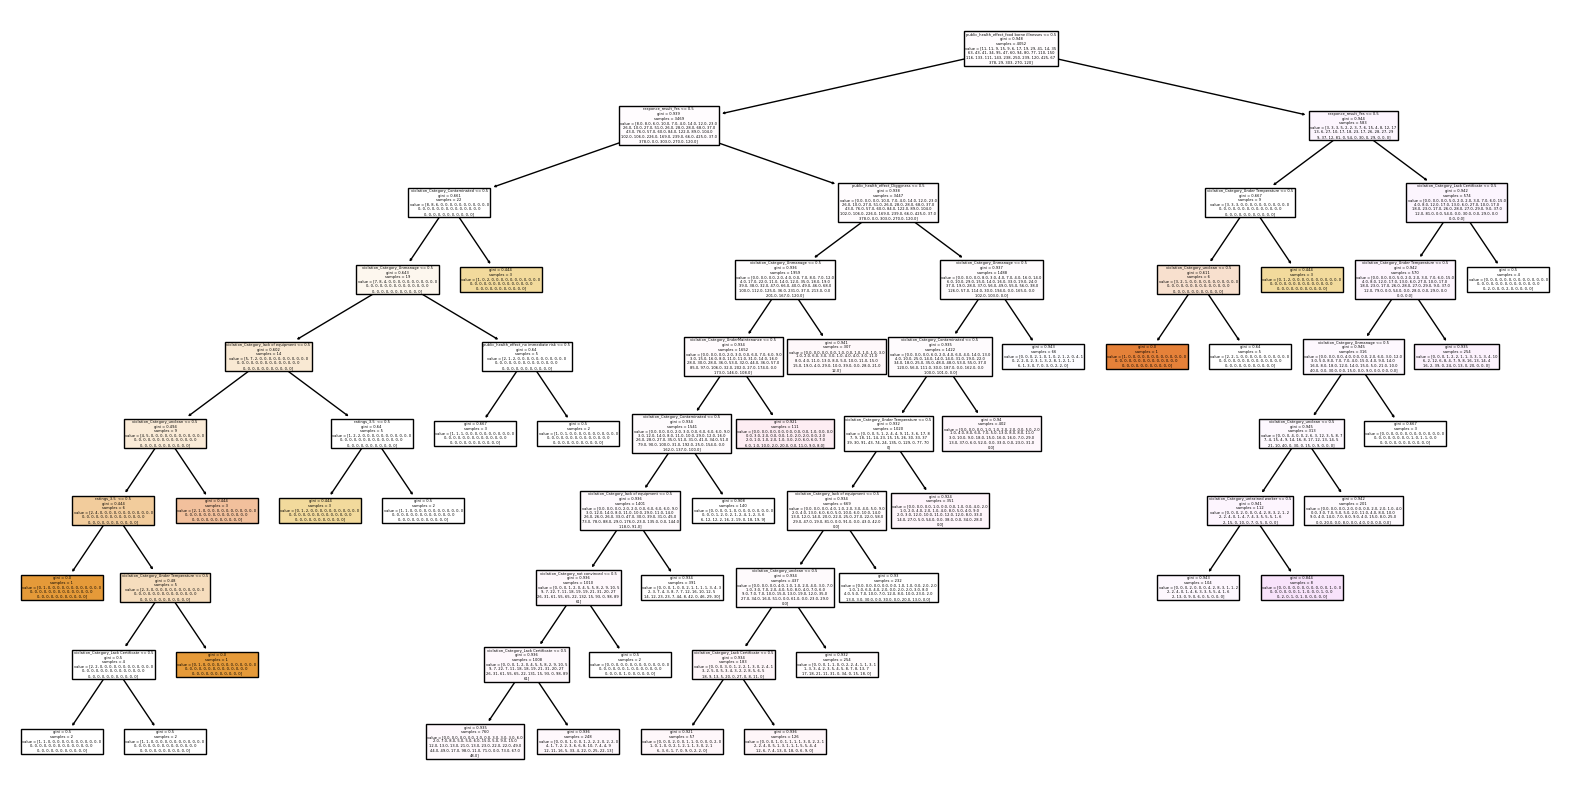

In [74]:
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
plot_tree(model, filled=True, feature_names=X.columns)
plt.show()


In [75]:
print("y_test:", y_test)


y_test: 349      96.0
28711    98.0
12885    90.0
7694     87.0
10620    71.0
         ... 
10076    78.0
1034     87.0
14027    90.0
10583    92.0
3088     87.0
Name: inspection_score, Length: 1014, dtype: float64


The **training accuracy** of **0.1338** and **testing accuracy** of **0.1055** indicate that the model's performance is quite low. Let's explore how a **decision tree** would handle this situation.

1. **Decision Tree Classifier**:
    - The **DecisionTreeClassifier** is commonly used for **classification problems** where the target variable has discrete labels (e.g., categories or classes) ².
    - Since our problem seems to involve continuous values (regression), the **DecisionTreeRegressor** would be more appropriate ¹.
    - The **mean squared error (MSE)** or **mean absolute error (MAE)** are typically used to evaluate regression models. These metrics quantify the difference between predicted and actual values.
    - The **R-squared score (R2)** is another useful metric. It measures the proportion of variance in the target variable explained by the model. An R2 score of 1 indicates a perfect fit, while lower values indicate less explanatory power ¹³.

2. **Decision Tree Regression**:
    - In regression trees, each leaf node predicts a continuous value (e.g., numeric grade, temperature, etc.).
    - The tree splits the data based on features to minimize the variance within each split.
    - The final prediction for a sample is the average value of the target variable in the corresponding leaf node.

3. **R2 Score for Decision Tree**:
    - Let's calculate the R2 score for our decision tree predictions:
        

the choice of model depends on the nature of our
problem (classification vs. regression) and the type of target variable. In our case, the decision tree regression provides a more suitable evaluation metric. 


In [80]:

features = ['business_city', 'business_state', 'inspection_type', 'risk_category', 'responce_result',
            'public_health_effect', 'ratings', 'violation_Category']
target = 'inspection_score'

X = df[features]
y = df[target]

#ne-hot encoding for categorical 
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

# Calculate R2 score
r2 = r2_score(y_test, y_test_pred) * 100

print(f"R2 Score = {r2:.2f}%")


R2 Score = 10.93%


An R2 score of **10.93%** indicates that our decision tree model is not explaining much of the variance in the target variable (inspection scores). In other words, the predictions made by the decision tree are not closely aligned with the actual scores.

Here are some note what more we can do with this data

1. **Feature Engineering**:
    - Explore additional features or transformations of existing features that might better capture the relationship with the target variable.
    - Consider interactions between features or polynomial features.

2. **Model Complexity**:
    - Experiment with different hyperparameters for the decision tree (e.g., max depth, minimum samples per leaf, etc.).
    - Prune the tree to prevent overfitting.

3. **Evaluate Other Models**:
    - Decision trees might not be the best choice for your specific problem. Trying other regression models like linear regression, random forests, or gradient boosting may also givea  nice result

4. **Cross-Validation**:
    - Use cross-validation to assess the model's performance on different subsets of the data.

model performance often involves an iterative process of experimentation and evaluation. 

## Lets test this with 
* linear regression,
* random forests, or
* gradient boosting

Decision Tree:

Training Accuracy: 0.13845014807502468
Testing Accuracy: 0.10157790927021697
Interpretation: Underfitting

Linear Regression:

Training Accuracy: 0.19228469165496864
Testing Accuracy: 0.10873115003886935
Interpretation: Underfitting

Random Forest:

Training Accuracy: 0.13845014807502468
Testing Accuracy: 0.09960552268244575
Interpretation: Underfitting

Gradient Boosting:

Training Accuracy: 0.1377097729516288
Testing Accuracy: 0.09861932938856016
Interpretation: Underfitting

KNN Classifier:

Training Accuracy: 0.05454096742349457
Testing Accuracy: 0.04339250493096647

LogisticRegression


Training Accuracy: 0.13376110562685095
Testing Accuracy: 0.10552268244575937

Interpretation: Underfitting
In summary, all models, including Decision Tree, Linear Regression, Random Forest,
Gradient Boosting, and KNN Classifier, are exhibiting underfitting.
This suggests that the models are too simple to capture the underlying patterns in the data, 
resulting in poor performance on both the training and testing datasets. To address underfitting, strategies 
such as using more complex models, adding more relevant features, or tuning hyperparameters may be necessary.

## But if I change the target value with also categorical I got the result very nice.

In [81]:

features = ['business_city', 'business_state', 'inspection_type', 'risk_category', 'public_health_effect', 'ratings', 'violation_Category']
target = 'responce_result'

X = df[features]
y = df[target]

# one-hot encoding for categorical 
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


y_train_pred = model.predict(X_train)


y_test_pred = model.predict(X_test)


train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.9923494570582428
Testing Accuracy: 0.9970414201183432


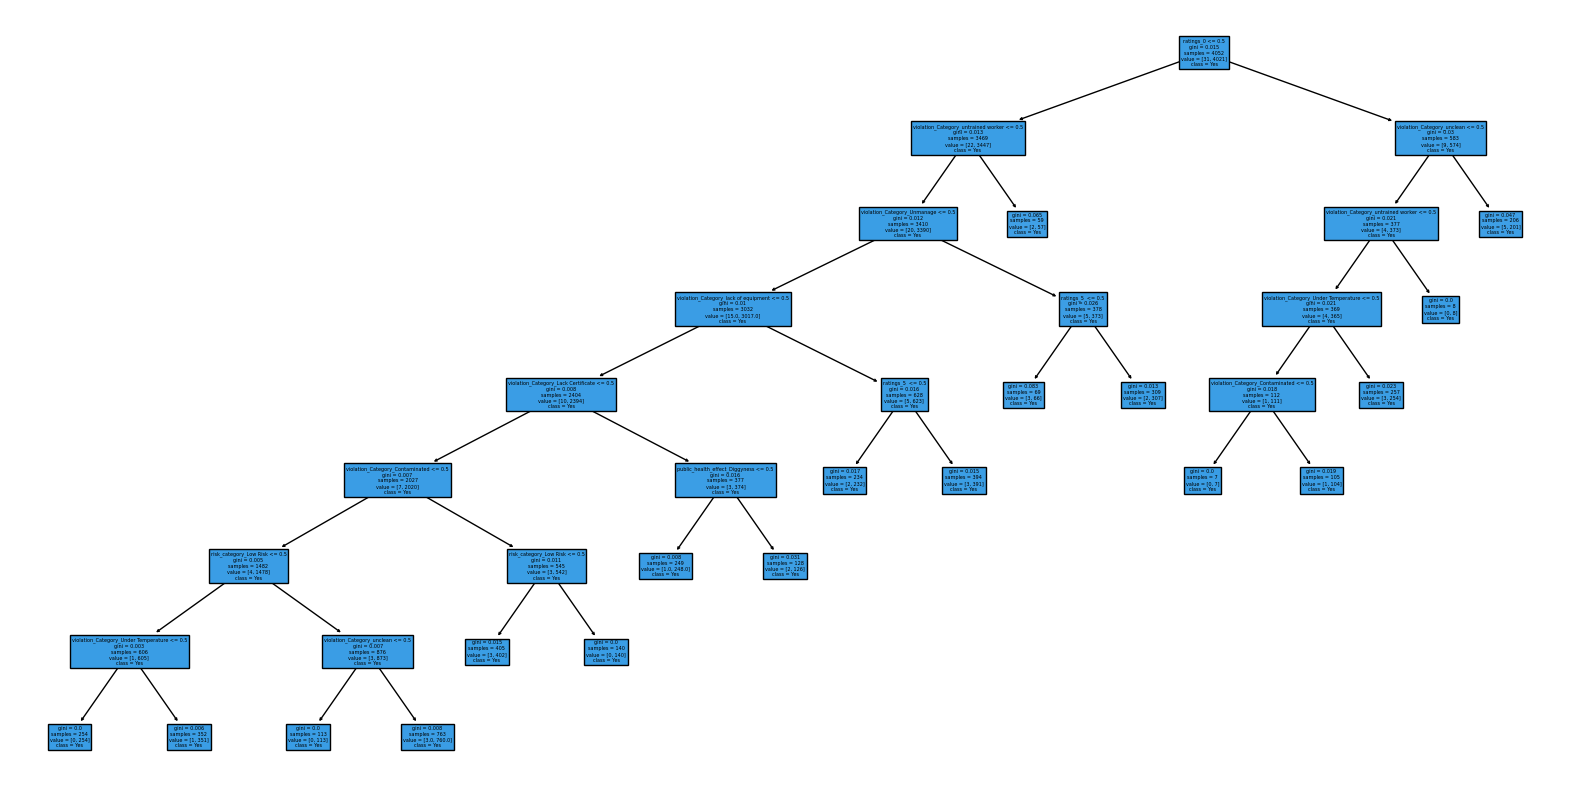

In [82]:

# Plotting the decision tree
plt.figure(figsize=(20, 10)) 
plot_tree(model, filled=True, feature_names=X.columns, class_names=model.classes_)
plt.show()



#### Both the training and testing accuracies are extremely high, 
* indicating a near-perfect performance of the Decision Tree classifier on both datasets.
* overfitting

### Last Method to look for 
* SMOTE

In [100]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [83]:

X = df.drop(columns=['inspection_score']) 
y = df['inspection_score']

encoder = OneHotEncoder(drop='first')
X_encoded = encoder.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

model = DecisionTreeClassifier()
model.fit(X_train_resampled, y_train_resampled)

train_accuracy = model.score(X_train_resampled, y_train_resampled)
test_accuracy = model.score(X_test, y_test)

print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)


Training accuracy: 1.0
Testing accuracy: 0.5631163708086785


* Training Accuracy: 1.0 (or 100%): The model performs perfectly on the training data, indicating that it has memorized the training set.

* Testing Accuracy: 0.569: The model's performance on unseen data (testing set) is substantially lower than its performance on the training data. 
This discrepancy suggests that the model may not generalize well to new, unseen instances.
####  this model is exhibiting overfitting

In [109]:
#X_train_resampled

In [110]:
#y_train_resampled

In [111]:
#y_train_resampled.value_counts()

# Second Part, where we have Business Category
* Uploading Data one more Time
* Taking only columns which are essential für Business
#### 'business_id''name''address''city''state''postal_code''latitude'	'longitude'	'phone_number'#
* Using the same process as inspection_score.
* cleaning all Data
* Using specific column
* Doing the same categorisation, and exporting it to Look for Tableau Visualisation
  

In [4]:
#Uploading Data one more Time
df_business = pd.read_csv("_Historical__Restaurant_Inspection_Scores__2016-2019__20240401.csv")
df_business

business_id                business_name     business_address  \
0           85936                 Laurel Court         950 Mason St   
1            5827  HILLCREST ELEMENTARY SCHOOL       810 SILVER Ave   
2           94910                Ike's Kitchen     800 Van Ness Ave   
3           64667           Jasmine Rae Bakery  1890 Bryant St #309   
4           97722           THE CHURRO FACTORY        PIER 39  K-01   
...           ...                          ...                  ...   
53968       70220            Trader Joe's #200         1095 Hyde St   
53969       95021                   Wing Wings        422 Haight St   
53970       78289              Sam Jordans Bar         4004 03rd St   
53971      100887            ASIA CHINESE FOOD          350 BAY ST.   
53972       15120       Nordstrom Espresso Bar    865 Market Street   

       business_city business_state business_postal_code  business_latitude  \
0      San Francisco             CA                94108                NaN   
1      San Francisco             CA                94134          37.729016   
2      San Francisco             CA                94109                NaN   
3      San Francisco             CA                94110          37.763156   
4      San Francisco             CA                94133                NaN   
...              ...            ...                  ...                ...   
53968  San Francisco             CA                94109                NaN   
53969  San Francisco             CA                94117                NaN   
53970  San Francisco             CA                94124                NaN   
53971  San Francisco             CA                94133                NaN   
53972  San Francisco             CA                94103          37.784317   

       business_longitude              business_location  \
0                     NaN                            NaN   
1             -122.419253  POINT (-122.419253 37.729016)   
2                     NaN                            NaN   
3             -122.410351  POINT (-122.410351 37.763156)   
4                     NaN                            NaN   
...                   ...                            ...   
53968                 NaN                            NaN   
53969                 NaN                            NaN   
53970                 NaN                            NaN   
53971                 NaN                            NaN   
53972         -122.407563  POINT (-122.407563 37.784317)   

       business_phone_number    inspection_id         inspection_date  \
0               1.415578e+10   85936_20170925  09/25/2017 12:00:00 AM   
1               1.415546e+10    5827_20170224  02/24/2017 12:00:00 AM   
2                        NaN   94910_20180530  05/30/2018 12:00:00 AM   
3                        NaN   64667_20170814  08/14/2017 12:00:00 AM   
4                        NaN   97722_20181217  12/17/2018 12:00:00 AM   
...                      ...              ...                     ...   
53968           1.415530e+10   70220_20170913  09/13/2017 12:00:00 AM   
53969           1.415584e+10   95021_20190228  02/28/2019 12:00:00 AM   
53970                    NaN   78289_20161209  12/09/2016 12:00:00 AM   
53971           1.415582e+10  100887_20190814  08/14/2019 12:00:00 AM   
53972                    NaN   15120_20180712  07/12/2018 12:00:00 AM   

       inspection_score            inspection_type           violation_id  \
0                 100.0      Routine - Unscheduled                    NaN   
1                   NaN      Reinspection/Followup                    NaN   
2                   NaN   New Ownership - Followup                    NaN   
3                   NaN      Reinspection/Followup                    NaN   
4                  96.0      Routine - Unscheduled  97722_20181217_103154   
...                 ...                        ...                    ...   
53968               NaN                  Complaint                 

* Business Column-
('business_id''name''address''city''state''postal_code''latitude'	'longitude'	'phone_number')

In [5]:
df_business = df_business.rename(columns=lambda x: x.lower().replace(' ', '_'))

In [6]:
df_business.head()

business_id                business_name     business_address  \
0       85936                 Laurel Court         950 Mason St   
1        5827  HILLCREST ELEMENTARY SCHOOL       810 SILVER Ave   
2       94910                Ike's Kitchen     800 Van Ness Ave   
3       64667           Jasmine Rae Bakery  1890 Bryant St #309   
4       97722           THE CHURRO FACTORY        PIER 39  K-01   

   business_city business_state business_postal_code  business_latitude  \
0  San Francisco             CA                94108                NaN   
1  San Francisco             CA                94134          37.729016   
2  San Francisco             CA                94109                NaN   
3  San Francisco             CA                94110          37.763156   
4  San Francisco             CA                94133                NaN   

   business_longitude              business_location  business_phone_number  \
0                 NaN                            NaN           1.415578e+10   
1         -122.419253  POINT (-122.419253 37.729016)           1.415546e+10   
2                 NaN                            NaN                    NaN   
3         -122.410351  POINT (-122.410351 37.763156)                    NaN   
4                 NaN                            NaN                    NaN   

    inspection_id         inspection_date  inspection_score  \
0  85936_20170925  09/25/2017 12:00:00 AM             100.0   
1   5827_20170224  02/24/2017 12:00:00 AM               NaN   
2  94910_20180530  05/30/2018 12:00:00 AM               NaN   
3  64667_20170814  08/14/2017 12:00:00 AM               NaN   
4  97722_20181217  12/17/2018 12:00:00 AM              96.0   

            inspection_type           violation_id  \
0     Routine - Unscheduled                    NaN   
1     Reinspection/Followup                    NaN   
2  New Ownership - Followup                    NaN   
3     Reinspection/Followup                    NaN   
4     Routine - Unscheduled  97722_20181217_103154   

                          violation_description risk_category  neighborhoods  \
0                                           NaN           NaN            NaN   
1                                           NaN           NaN           92.0   
2                                           NaN           NaN            NaN   
3                                           NaN           NaN           53.0   
4  Unclean or degraded floors walls or ceilings      Low Risk            NaN   

   sf_find_neighborhoods  current_police_districts  \
0                    NaN                       NaN   
1                   92.0                       2.0   
2                    NaN                       NaN   
3                   53.0                       3.0   
4                    NaN                       NaN   

   current_supervisor_districts  analysis_neighborhoods  
0                           NaN                     NaN  
1                           2.0                     7.0  
2                           NaN                     NaN  
3                           2.0                    20.0  
4                           NaN                     NaN

In [7]:
# Check the data types 
df_business.dtypes

business_id                      object
business_name                    object
business_address                 object
business_city                    object
business_state                   object
business_postal_code             object
business_latitude               float64
business_longitude              float64
business_location                object
business_phone_number           float64
inspection_id                    object
inspection_date                  object
inspection_score                float64
inspection_type                  object
violation_id                     object
violation_description            object
risk_category                    object
neighborhoods                   float64
sf_find_neighborhoods           float64
current_police_districts        float64
current_supervisor_districts    float64
analysis_neighborhoods          float64
dtype: object

In [8]:
df_business.isna().sum()

business_id                         0
business_name                    2072
business_address                 2072
business_city                    2072
business_state                   2072
business_postal_code             3212
business_latitude               27400
business_longitude              27400
business_location               27415
business_phone_number           36732
inspection_id                    2072
inspection_date                  2072
inspection_score                15895
inspection_type                  2072
violation_id                    15159
violation_description           15159
risk_category                   15159
neighborhoods                   27440
sf_find_neighborhoods           27440
current_police_districts        27428
current_supervisor_districts    27428
analysis_neighborhoods          27428
dtype: int64

In [9]:
for col in df_business.columns:
    pct_missing = np.mean(df_business[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

business_id - 0%
business_name - 4%
business_address - 4%
business_city - 4%
business_state - 4%
business_postal_code - 6%
business_latitude - 51%
business_longitude - 51%
business_location - 51%
business_phone_number - 68%
inspection_id - 4%
inspection_date - 4%
inspection_score - 29%
inspection_type - 4%
violation_id - 28%
violation_description - 28%
risk_category - 28%
neighborhoods - 51%
sf_find_neighborhoods - 51%
current_police_districts - 51%
current_supervisor_districts - 51%
analysis_neighborhoods - 51%


In [10]:
# Specify the columns to drop
columns_to_drop = [
    "business_location", 
    "inspection_id", 
    "inspection_date", 
    "inspection_type", 
    "violation_id",  
    "neighborhoods", 
    "sf_find_neighborhoods", 
    "current_police_districts", 
    "analysis_neighborhoods"
]

# Drop the specified columns
df_business.drop(columns_to_drop, axis=1, inplace=True)
df_business

business_id                business_name     business_address  \
0           85936                 Laurel Court         950 Mason St   
1            5827  HILLCREST ELEMENTARY SCHOOL       810 SILVER Ave   
2           94910                Ike's Kitchen     800 Van Ness Ave   
3           64667           Jasmine Rae Bakery  1890 Bryant St #309   
4           97722           THE CHURRO FACTORY        PIER 39  K-01   
...           ...                          ...                  ...   
53968       70220            Trader Joe's #200         1095 Hyde St   
53969       95021                   Wing Wings        422 Haight St   
53970       78289              Sam Jordans Bar         4004 03rd St   
53971      100887            ASIA CHINESE FOOD          350 BAY ST.   
53972       15120       Nordstrom Espresso Bar    865 Market Street   

       business_city business_state business_postal_code  business_latitude  \
0      San Francisco             CA                94108                NaN   
1      San Francisco             CA                94134          37.729016   
2      San Francisco             CA                94109                NaN   
3      San Francisco             CA                94110          37.763156   
4      San Francisco             CA                94133                NaN   
...              ...            ...                  ...                ...   
53968  San Francisco             CA                94109                NaN   
53969  San Francisco             CA                94117                NaN   
53970  San Francisco             CA                94124                NaN   
53971  San Francisco             CA                94133                NaN   
53972  San Francisco             CA                94103          37.784317   

       business_longitude  business_phone_number  inspection_score  \
0                     NaN           1.415578e+10             100.0   
1             -122.419253           1.415546e+10               NaN   
2                     NaN                    NaN               NaN   
3             -122.410351                    NaN               NaN   
4                     NaN                    NaN              96.0   
...                   ...                    ...               ...   
53968                 NaN           1.415530e+10               NaN   
53969                 NaN           1.415584e+10              92.0   
53970                 NaN                    NaN               NaN   
53971                 NaN           1.415582e+10               NaN   
53972         -122.407563                    NaN               NaN   

                                   violation_description  risk_category  \
0                                                    NaN            NaN   
1                                                    NaN            NaN   
2                                                    NaN            NaN   
3                                                    NaN            NaN   
4           Unclean or degraded floors walls or ceilings       Low Risk   
...                                                  ...            ...   
53968                                                NaN            NaN   
53969  Inadequate and inaccessible handwashing facili...  Moderate Risk   
53970                                                NaN            NaN   
53971                                                NaN            NaN   
53972                                                NaN            NaN   

       current_supervisor_districts  
0                               NaN  
1                               2.0  
2                               NaN  
3                               2.0  
4                               NaN  
...                             ...  
53968                           NaN  
53969                           NaN  
53970                           NaN  
53971                           NaN  
53972                          10.0  

[5397

In [11]:
df_business.columns

Index(['business_id', 'business_name', 'business_address', 'business_city',
       'business_state', 'business_postal_code', 'business_latitude',
       'business_longitude', 'business_phone_number', 'inspection_score',
       'violation_description', 'risk_category',
       'current_supervisor_districts'],
      dtype='object')

In [12]:
df_business.dropna(subset=['business_id', 'business_name', 'business_address', 'business_city',
       'business_state', 'business_postal_code', 'business_latitude',
       'business_longitude', 'business_phone_number', 'inspection_score',
       'violation_description','risk_category', 'current_supervisor_districts'], inplace=True) 

In [13]:
df_business

business_id            business_name   business_address  business_city  \
110          3649            SAFEWAY #1490       2300 16th St  San Francisco   
119           184             RADIO HABANA   1109 VALENCIA St  San Francisco   
122          1154     SUNFLOWER RESTAURANT    506 Valencia St  San Francisco   
123          1636                     AXUM      698 Haight St  San Francisco   
173          7764   YASUKOCHI'S SWEET SHOP     1790 SUTTER St  San Francisco   
...           ...                      ...                ...            ...   
37965       67237                  La Jefa  445 Bayshore Blvd  San Francisco   
38042       68442             Sauce Belden       56 Belden Pl  San Francisco   
38045       67330  San Tung Restaurant LLC     1031 Irving St  San Francisco   
38099       69769       Whole Foods Market     1150 Ocean Ave  San Francisco   
38116       71476  Chou Chou Bakery Bistro     400 Dewey Blvd  San Francisco   

      business_state business_postal_code  business_latitude  \
110               CA                94103          37.765708   
119               CA                94110          37.755124   
122               CA                94103          37.764678   
123               CA                94117          37.771738   
173               CA                94115          37.786590   
...              ...                  ...                ...   
37965             CA                94107          37.749871   
38042             CA                94104          37.791458   
38045             CA                94122          37.763891   
38099             CA                94112          37.723652   
38116             CA                94116          37.747174   

       business_longitude  business_phone_number  inspection_score  \
110           -122.409002           1.415557e+10              82.0   
119           -122.420916           1.415583e+10              90.0   
122           -122.421905           1.415563e+10              46.0   
123           -122.433583           1.415526e+10              88.0   
173           -122.429815           1.415594e+10              90.0   
...                   ...                    ...               ...   
37965         -122.405648           1.415533e+10              84.0   
38042         -122.403787           1.415525e+10              88.0   
38045         -122.468805           1.415524e+10              88.0   
38099         -122.454610           1.415534e+10              88.0   
38116         -122.459368           1.415524e+10              92.0   

                                   violation_description  risk_category  \
110                     Moderate risk vermin infestation  Moderate Risk   
119              Insufficient hot water or running water  Moderate Risk   
122    Inadequate and inaccessible handwashing facili...  Moderate Risk   
123    Wiping cloths not clean or properly stored or ...       Low Risk   
173         Unclean or degraded floors walls or ceilings       Low Risk   
...                                                  ...            ...   
37965       Unclean or degraded floors walls or ceilings       Low Risk   
38042                        Low risk vermin infestation       Low Risk   
38045       Unclean or degraded floors walls or ceilings       Low Risk   
38099  Inadequately cleaned or sanitized food contact...  Moderate Risk   
38116  Inadequately cleaned or sanitized food contact...  Moderate Risk   

       current_supervisor_districts  
110                             9.0  
119                             2.0  
122                             5.0  
123                            11.0  
173                            11.0  
...                             ...  
37965                           2.0  
38042                           3.0  
38045                          11.0  
38099                           8.0  
38116                           8.0  

[5076 rows x 13 columns]

In [96]:
# Convert 'risk_category' column to numeric (assuming it contains strings like 'Moderate Risk', 'Low Risk', etc.)
df_business["public_health_effect"] = pd.to_numeric(df_business["risk_category"], errors='coerce')

def advisor(risk_category):
    if risk_category == 'High Risk':
        return "food borne illnesses"
    elif risk_category in ['Moderate Risk']:
        return "Dizzyness"
    else:
        return "no immediate risk"

df_business["public_health_effect"] = df["risk_category"].apply(lambda x : advisor (x))
df_business

business_id            business_name   business_address  business_city  \
110          3649            SAFEWAY #1490       2300 16th St  San Francisco   
119           184             RADIO HABANA   1109 VALENCIA St  San Francisco   
122          1154     SUNFLOWER RESTAURANT    506 Valencia St  San Francisco   
123          1636                     AXUM      698 Haight St  San Francisco   
173          7764   YASUKOCHI'S SWEET SHOP     1790 SUTTER St  San Francisco   
...           ...                      ...                ...            ...   
37965       67237                  La Jefa  445 Bayshore Blvd  San Francisco   
38042       68442             Sauce Belden       56 Belden Pl  San Francisco   
38045       67330  San Tung Restaurant LLC     1031 Irving St  San Francisco   
38099       69769       Whole Foods Market     1150 Ocean Ave  San Francisco   
38116       71476  Chou Chou Bakery Bistro     400 Dewey Blvd  San Francisco   

      business_state business_postal_code  business_latitude  \
110               CA                94103          37.765708   
119               CA                94110          37.755124   
122               CA                94103          37.764678   
123               CA                94117          37.771738   
173               CA                94115          37.786590   
...              ...                  ...                ...   
37965             CA                94107          37.749871   
38042             CA                94104          37.791458   
38045             CA                94122          37.763891   
38099             CA                94112          37.723652   
38116             CA                94116          37.747174   

       business_longitude  business_phone_number  inspection_score  \
110           -122.409002           1.415557e+10              82.0   
119           -122.420916           1.415583e+10              90.0   
122           -122.421905           1.415563e+10              46.0   
123           -122.433583           1.415526e+10              88.0   
173           -122.429815           1.415594e+10              90.0   
...                   ...                    ...               ...   
37965         -122.405648           1.415533e+10              84.0   
38042         -122.403787           1.415525e+10              88.0   
38045         -122.468805           1.415524e+10              88.0   
38099         -122.454610           1.415534e+10              88.0   
38116         -122.459368           1.415524e+10              92.0   

                                   violation_description  risk_category  \
110                     Moderate risk vermin infestation  Moderate Risk   
119              Insufficient hot water or running water  Moderate Risk   
122    Inadequate and inaccessible handwashing facili...  Moderate Risk   
123    Wiping cloths not clean or properly stored or ...       Low Risk   
173         Unclean or degraded floors walls or ceilings       Low Risk   
...                                                  ...            ...   
37965       Unclean or degraded floors walls or ceilings       Low Risk   
38042                        Low risk vermin infestation       Low Risk   
38045       Unclean or degraded floors walls or ceilings       Low Risk   
38099  Inadequately cleaned or sanitized food contact...  Moderate Risk   
38116  Inadequately cleaned or sanitized food contact...  Moderate Risk   

       current_supervisor_districts violation_Category responce_result  \
110                             9.0       Contaminated             Yes   
119                             2.0  Under Temperature             Yes   
122                             5.0  lack of equipment              NO   
123                            11.0            unclean             Yes   
173                            11.0            unclean             Yes   
...                             ...                ...             ...   
37965           

In [97]:
def advisor(violation_description):
    if violation_description in ['Unclean or degraded floors walls or ceilings',
                                 'Inadequately cleaned or sanitized food contact surfaces',
                                 'Wiping cloths not clean or properly stored or inadequate sanitizer',
                                 'Unclean nonfood contact surfaces',
                                 'Unclean or unsanitary food contact surfaces',
                                 'Unclean hands or improper use of gloves',
                                 'Unclean unmaintained or improperly constructed toilet facilities',
                                 'Unsanitary employee garments hair or nails']:
        return "unclean"
    elif violation_description in ['Unapproved or unmaintained equipment or utensils',
                                   'Inadequate and inaccessible handwashing facilities',
                                   'Inadequate warewashing facilities or equipment',
                                   'No thermometers or uncalibrated thermometers']:
        return "lack of equipment"
    elif violation_description in ['Moderate risk food holding temperature',
                                   'High risk food holding temperature',
                                   'Insufficient hot water or running water',
                                   'Improper cooling methods',
                                   'No hot water or running water']:
        return "Under Temperature"
    elif violation_description in ['Moderate risk vermin infestation',
                                   'Foods not protected from contamination',
                                   'Low risk vermin infestation',
                                   'Contaminated or adulterated food',
                                   'High risk vermin infestation',
                                   'Sewage or wastewater contamination']:
        return "Contaminated"
    elif violation_description in ['Improper food storage',
                                   'Improper storage of equipment utensils or linens',
                                   'Improper thawing methods',
                                   'Improper storage use or identification of toxic substances',
                                   'Inadequate dressing rooms or improper storage of personal items',
                                   'Reservice of previously served foods',
                                   'No person in charge of food facility',
                                   'Unapproved living quarters in food facility',
                                   'Unapproved food source',
                                   'Other moderate risk violation',
                                   'Other high risk violation']:
        return "Unmanage"
    elif violation_description in ['Food safety certificate or food handler card not available',
                                   'Inadequate food safety knowledge or lack of certified food safety manager',
                                   'Permit license or inspection report not posted',
                                   'Other low risk violation',
                                   'Noncompliance with HAACP plan or variance',
                                   'Improper food labeling or menu misrepresentation',
                                   'Inadequate procedures or records for time as a public health control',
                                   'Inadequate or unsanitary refuse containers or area or no garbage service',
                                   'No plan review or Building Permit',
                                   'Unauthorized or unsafe use of time as a public health control measure',
                                   'Worker safety hazards',
                                   'Non service animal',
                                   'Unpermitted food facility',
                                   'Inadequate HACCP plan record keeping']:
        return "Lack Certificate"
    elif violation_description in ['Improper or defective plumbing', 'Inadequate ventilation or lighting']:
        return "UnderMaintenance"
    elif violation_description in ['Employee eating or smoking',
                                   'Food in poor condition',
                                   'Improper reheating of food',
                                   'Noncompliance with shell fish tags or display',
                                   'Inadequate sewage or wastewater disposal']:
        return "untrained worker"
    elif violation_description in ['Low Risk', 'Moderate Risk']:
        return "expire-food reserve"
    else:
        return "not convinced"

# Applying the advisor function to create the violation category column
df_business["violation_Category"] = df_business["violation_description"].apply(lambda x: advisor(x))
df_business

business_id            business_name   business_address  business_city  \
110          3649            SAFEWAY #1490       2300 16th St  San Francisco   
119           184             RADIO HABANA   1109 VALENCIA St  San Francisco   
122          1154     SUNFLOWER RESTAURANT    506 Valencia St  San Francisco   
123          1636                     AXUM      698 Haight St  San Francisco   
173          7764   YASUKOCHI'S SWEET SHOP     1790 SUTTER St  San Francisco   
...           ...                      ...                ...            ...   
37965       67237                  La Jefa  445 Bayshore Blvd  San Francisco   
38042       68442             Sauce Belden       56 Belden Pl  San Francisco   
38045       67330  San Tung Restaurant LLC     1031 Irving St  San Francisco   
38099       69769       Whole Foods Market     1150 Ocean Ave  San Francisco   
38116       71476  Chou Chou Bakery Bistro     400 Dewey Blvd  San Francisco   

      business_state business_postal_code  business_latitude  \
110               CA                94103          37.765708   
119               CA                94110          37.755124   
122               CA                94103          37.764678   
123               CA                94117          37.771738   
173               CA                94115          37.786590   
...              ...                  ...                ...   
37965             CA                94107          37.749871   
38042             CA                94104          37.791458   
38045             CA                94122          37.763891   
38099             CA                94112          37.723652   
38116             CA                94116          37.747174   

       business_longitude  business_phone_number  inspection_score  \
110           -122.409002           1.415557e+10              82.0   
119           -122.420916           1.415583e+10              90.0   
122           -122.421905           1.415563e+10              46.0   
123           -122.433583           1.415526e+10              88.0   
173           -122.429815           1.415594e+10              90.0   
...                   ...                    ...               ...   
37965         -122.405648           1.415533e+10              84.0   
38042         -122.403787           1.415525e+10              88.0   
38045         -122.468805           1.415524e+10              88.0   
38099         -122.454610           1.415534e+10              88.0   
38116         -122.459368           1.415524e+10              92.0   

                                   violation_description  risk_category  \
110                     Moderate risk vermin infestation  Moderate Risk   
119              Insufficient hot water or running water  Moderate Risk   
122    Inadequate and inaccessible handwashing facili...  Moderate Risk   
123    Wiping cloths not clean or properly stored or ...       Low Risk   
173         Unclean or degraded floors walls or ceilings       Low Risk   
...                                                  ...            ...   
37965       Unclean or degraded floors walls or ceilings       Low Risk   
38042                        Low risk vermin infestation       Low Risk   
38045       Unclean or degraded floors walls or ceilings       Low Risk   
38099  Inadequately cleaned or sanitized food contact...  Moderate Risk   
38116  Inadequately cleaned or sanitized food contact...  Moderate Risk   

       current_supervisor_districts violation_Category responce_result  \
110                             9.0       Contaminated             Yes   
119                             2.0  Under Temperature             Yes   
122                             5.0  lack of equipment              NO   
123                            11.0            unclean             Yes   
173                            11.0            unclean             Yes   
...                             ...                ...             ...   
37965           

In [115]:
df_business["responce_result"] = pd.to_numeric(df["inspection_score"], errors='coerce')
    
def advisor(inspection_score):
    if inspection_score < 60:
        return "NO"
    else:
        return "Yes"

df_business["responce_result"] = df_business["inspection_score"].apply(lambda x : advisor (x))
df_business

business_id            business_name   business_address  business_city  \
110          3649            SAFEWAY #1490       2300 16th St  San Francisco   
119           184             RADIO HABANA   1109 VALENCIA St  San Francisco   
122          1154     SUNFLOWER RESTAURANT    506 Valencia St  San Francisco   
123          1636                     AXUM      698 Haight St  San Francisco   
173          7764   YASUKOCHI'S SWEET SHOP     1790 SUTTER St  San Francisco   
...           ...                      ...                ...            ...   
37965       67237                  La Jefa  445 Bayshore Blvd  San Francisco   
38042       68442             Sauce Belden       56 Belden Pl  San Francisco   
38045       67330  San Tung Restaurant LLC     1031 Irving St  San Francisco   
38099       69769       Whole Foods Market     1150 Ocean Ave  San Francisco   
38116       71476  Chou Chou Bakery Bistro     400 Dewey Blvd  San Francisco   

      business_state business_postal_code  business_latitude  \
110               CA                94103          37.765708   
119               CA                94110          37.755124   
122               CA                94103          37.764678   
123               CA                94117          37.771738   
173               CA                94115          37.786590   
...              ...                  ...                ...   
37965             CA                94107          37.749871   
38042             CA                94104          37.791458   
38045             CA                94122          37.763891   
38099             CA                94112          37.723652   
38116             CA                94116          37.747174   

       business_longitude  business_phone_number  inspection_score  \
110           -122.409002           1.415557e+10              82.0   
119           -122.420916           1.415583e+10              90.0   
122           -122.421905           1.415563e+10              46.0   
123           -122.433583           1.415526e+10              88.0   
173           -122.429815           1.415594e+10              90.0   
...                   ...                    ...               ...   
37965         -122.405648           1.415533e+10              84.0   
38042         -122.403787           1.415525e+10              88.0   
38045         -122.468805           1.415524e+10              88.0   
38099         -122.454610           1.415534e+10              88.0   
38116         -122.459368           1.415524e+10              92.0   

                                   violation_description  risk_category  \
110                     Moderate risk vermin infestation  Moderate Risk   
119              Insufficient hot water or running water  Moderate Risk   
122    Inadequate and inaccessible handwashing facili...  Moderate Risk   
123    Wiping cloths not clean or properly stored or ...       Low Risk   
173         Unclean or degraded floors walls or ceilings       Low Risk   
...                                                  ...            ...   
37965       Unclean or degraded floors walls or ceilings       Low Risk   
38042                        Low risk vermin infestation       Low Risk   
38045       Unclean or degraded floors walls or ceilings       Low Risk   
38099  Inadequately cleaned or sanitized food contact...  Moderate Risk   
38116  Inadequately cleaned or sanitized food contact...  Moderate Risk   

       current_supervisor_districts violation_Category responce_result  \
110                             9.0       Contaminated             Yes   
119                             2.0  Under Temperature             Yes   
122                             5.0  lack of equipment              NO   
123                            11.0            unclean             Yes   
173                            11.0            unclean             Yes   
...                             ...                ...             ...   
37965           

In [116]:
df_business["ratings"] = pd.to_numeric(df["risk_category"], errors='coerce')

def advisor(risk_category):
    if risk_category == 'High Risk':
        return "0"
    elif risk_category in ['Moderate Risk']:
        return "3.5 "
    else:
        return "5 "

df_business["ratings"] = df_business["risk_category"].apply(lambda x : advisor (x))
df_business

business_id            business_name   business_address  business_city  \
110          3649            SAFEWAY #1490       2300 16th St  San Francisco   
119           184             RADIO HABANA   1109 VALENCIA St  San Francisco   
122          1154     SUNFLOWER RESTAURANT    506 Valencia St  San Francisco   
123          1636                     AXUM      698 Haight St  San Francisco   
173          7764   YASUKOCHI'S SWEET SHOP     1790 SUTTER St  San Francisco   
...           ...                      ...                ...            ...   
37965       67237                  La Jefa  445 Bayshore Blvd  San Francisco   
38042       68442             Sauce Belden       56 Belden Pl  San Francisco   
38045       67330  San Tung Restaurant LLC     1031 Irving St  San Francisco   
38099       69769       Whole Foods Market     1150 Ocean Ave  San Francisco   
38116       71476  Chou Chou Bakery Bistro     400 Dewey Blvd  San Francisco   

      business_state business_postal_code  business_latitude  \
110               CA                94103          37.765708   
119               CA                94110          37.755124   
122               CA                94103          37.764678   
123               CA                94117          37.771738   
173               CA                94115          37.786590   
...              ...                  ...                ...   
37965             CA                94107          37.749871   
38042             CA                94104          37.791458   
38045             CA                94122          37.763891   
38099             CA                94112          37.723652   
38116             CA                94116          37.747174   

       business_longitude  business_phone_number  inspection_score  \
110           -122.409002           1.415557e+10              82.0   
119           -122.420916           1.415583e+10              90.0   
122           -122.421905           1.415563e+10              46.0   
123           -122.433583           1.415526e+10              88.0   
173           -122.429815           1.415594e+10              90.0   
...                   ...                    ...               ...   
37965         -122.405648           1.415533e+10              84.0   
38042         -122.403787           1.415525e+10              88.0   
38045         -122.468805           1.415524e+10              88.0   
38099         -122.454610           1.415534e+10              88.0   
38116         -122.459368           1.415524e+10              92.0   

                                   violation_description  risk_category  \
110                     Moderate risk vermin infestation  Moderate Risk   
119              Insufficient hot water or running water  Moderate Risk   
122    Inadequate and inaccessible handwashing facili...  Moderate Risk   
123    Wiping cloths not clean or properly stored or ...       Low Risk   
173         Unclean or degraded floors walls or ceilings       Low Risk   
...                                                  ...            ...   
37965       Unclean or degraded floors walls or ceilings       Low Risk   
38042                        Low risk vermin infestation       Low Risk   
38045       Unclean or degraded floors walls or ceilings       Low Risk   
38099  Inadequately cleaned or sanitized food contact...  Moderate Risk   
38116  Inadequately cleaned or sanitized food contact...  Moderate Risk   

       current_supervisor_districts violation_Category responce_result  \
110                             9.0       Contaminated             Yes   
119                             2.0  Under Temperature             Yes   
122                             5.0  lack of equipment              NO   
123                            11.0            unclean             Yes   
173                            11.0            unclean             Yes   
...                             ...                ...             ...   
37965           

In [117]:
df_business.to_csv('Business.csv')

In [118]:
import plotly.graph_objects as go

In [119]:
df_business.columns

Index(['business_id', 'business_name', 'business_address', 'business_city',
       'business_state', 'business_postal_code', 'business_latitude',
       'business_longitude', 'business_phone_number', 'inspection_score',
       'violation_description', 'risk_category',
       'current_supervisor_districts', 'violation_Category', 'responce_result',
       'ratings', 'public_health_effect'],
      dtype='object')

In [120]:
latitudes = df_business['business_latitude']

In [121]:
longitudes = df_business['business_longitude']


In [122]:
addresses = df_business['business_address']

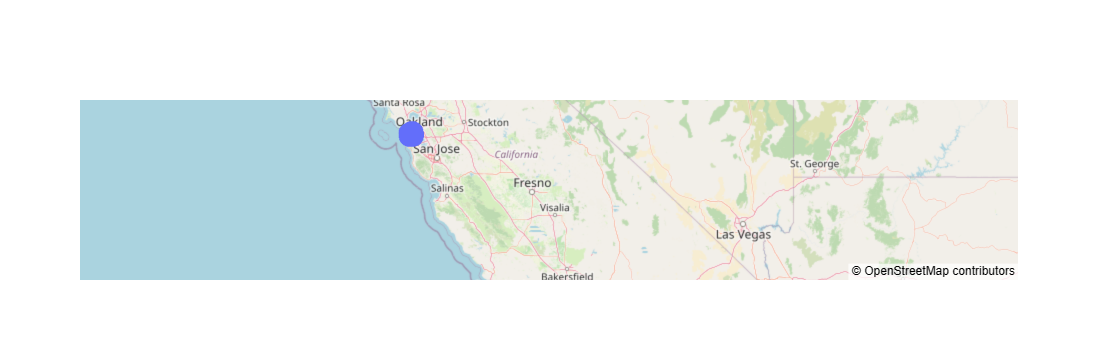

In [123]:

# Create Plotly figure
fig = go.Figure()

# Add scatter plot for addresses
fig.add_trace(go.Scattermapbox(
    lat=latitudes,
    lon=longitudes,
    mode='markers',
    marker=go.scattermapbox.Marker(
        size=20
    ),
    text=addresses,
    hoverinfo='text'
))

# Define map layout
fig.update_layout(
    mapbox_style="open-street-map",
    mapbox=dict(
        center=dict(lat=36.7783, lon=-119.4179),  # Center of California
        zoom=5
    )
)

# Display the figure
fig.show()






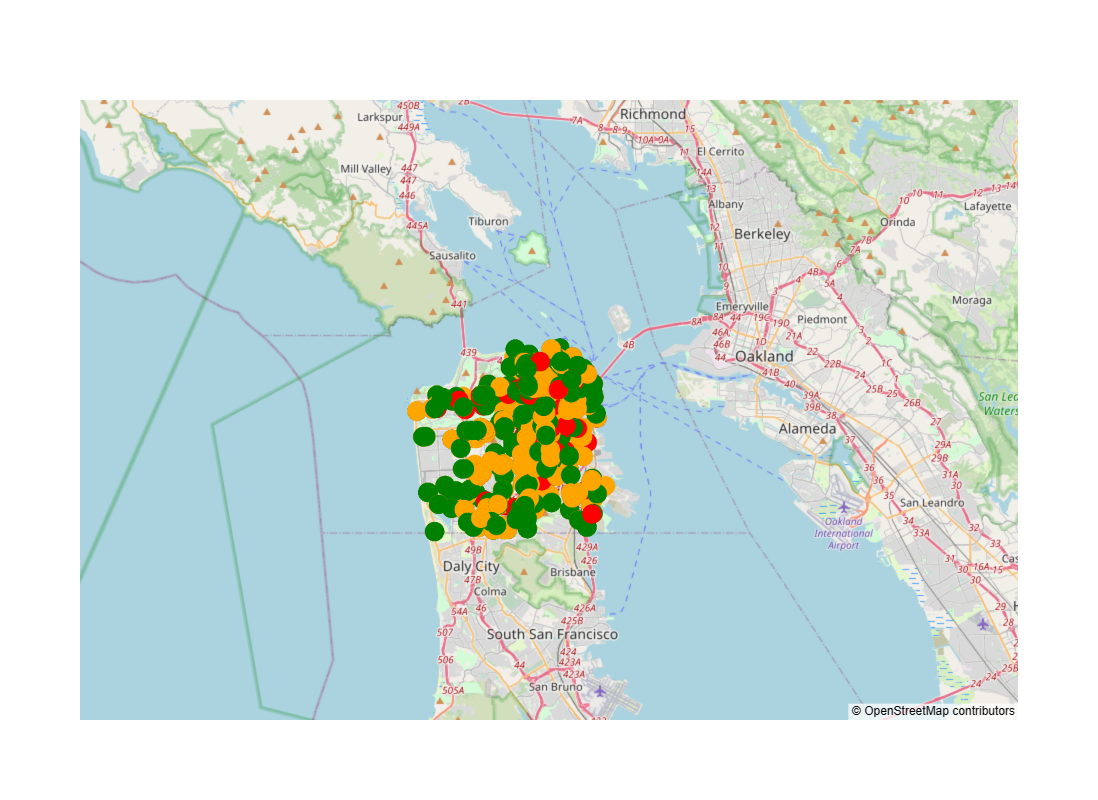

In [131]:
df_business['public_health_effect'].fillna('default_color', inplace=True)

# Extracting necessary columns
business_names = df_business['business_name']
inspection_scores = df_business['inspection_score']
public_health_effects = df_business['public_health_effect']  # Updated column name
violation_categories = df_business['violation_Category']
response_results = df_business['responce_result']
ratings = df_business['ratings']

# Define colors for public health effects
public_health_effect_colors = {
     'food borne illnesses': 'red',
     'Diggyness': 'orange',
     'no immediate risk': 'green'
    # Add more colors as needed
}

# Create the scatter plot
fig = go.Figure()

# Add scatter plot for addresses
fig.add_trace(go.Scattermapbox(
    lat=latitudes,
    lon=longitudes,
    mode='markers',
    marker=go.scattermapbox.Marker(
        size=20,
        color=[public_health_effect_colors.get(effect, 'orange') for effect in public_health_effects],  # Assigning colors based on public health effect
    ),
    text=[
        f"Business Name: {business_name}<br>"
        f"Inspection Score: {inspection_score}<br>"
        f"Public Health Effect: {public_health_effect}<br>"
        f"Violation Category: {violation_Category}<br>"
        f"Response Result: {responce_result}<br>"
        f"Ratings: {rating}"
        for business_name, inspection_score, public_health_effect, violation_Category, responce_result, rating in zip(
            business_names, inspection_scores, public_health_effects, violation_categories, response_results, ratings
        )
    ],
    hoverinfo='text'
))

# Define map layout and adjust size
fig.update_layout(
    mapbox_style="open-street-map",
    mapbox=dict(
        zoom=10,
        center=dict(lat=37.7749, lon=-122.4194),  # Default center for San Francisco
    ),
    height=800,
    width=1000   # Adjust width of the map
)

# Show the plot
fig.show()